<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homewrok: Neural Networks 2</center></h2>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,\
    Flatten, Convolution2D, MaxPooling2D

RND_SEED = 7
np.random.seed(RND_SEED)

%matplotlib inline

# Intro

For this homework you are propossed to 
1. implement autoencoder model based on Keras library using MNIST sample.
2. set up your own dataset for transfer learning and apply pretrained model

# Autoencoders


Idea of autoencoders is illustrated in the following figure:
<center><img src='img/autoencoder_schema.jpg'></center>

Autoencoder consists of two parts: encoder and decoder.
Encoder takes an image and encodes it into another image or vector with smaller size. In other words, it compresses the image. On the other hand, decoder takes the compressed image and reconstructs the original image. If the autoencoder is designed and fitted properly, the original and reconstructed images will be similar. 

# Fully-connected Autoencoder

Consider an autoencoder which consists only fully-connected layers (no convolutions, no pooling et al.) as it is show in figure:

<center><img src='img/ae.png'></center>

This autoencoder takes an image as a vector and encodes it into a vector of smaller size. Its output is a reconstructed image represented as a vector of the same size as the input. 

## Task 1 (1 point)

Download and read MNIST sample. Plot several images. Do all preprocessing steps needed for the autoencoder.

Hint: use `from tensorflow.keras.datasets import mnist`

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

(60000, 10000, 28, 28)

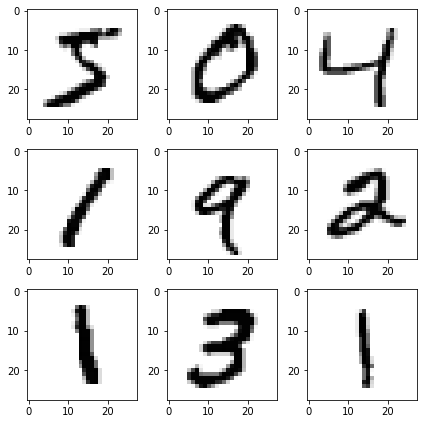

In [19]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train, X_test

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


## Task 2 (3 points)

Implement your autoencoder using Keras library with the following structure:
- **Encoder** has one fully-connected layer, that compresses an input image into a vector of size 49.
- **Decoder** has one fully-connected layer, that reconstructs the original image. 

Fit your autoencoder during 5 epochs. Use **mse** error function.

Hint: see Keras examples from your seminars.

In [21]:
X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))

print('X_train:    ', X_train.shape)
print('X_train_nn: ', X_train_nn.shape)

X_train:     (60000, 28, 28)
X_train_nn:  (60000, 784)


In [22]:
model = Sequential()
model.add(Dense(49, input_shape=X_train_nn[0].shape, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(X_train_nn[0].shape[0], activation='softmax'))

model.compile(loss='mse', optimizer='adam')

In [24]:
model.fit(X_train_nn,
          X_train_nn,
          epochs=5,
          validation_data=(X_test_nn, X_test_nn))

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1124

  23/1875 [..............................] - ETA: 4s - loss: 0.1102

  40/1875 [..............................] - ETA: 4s - loss: 0.1107

  62/1875 [..............................] - ETA: 4s - loss: 0.1112

  84/1875 [>.............................] - ETA: 4s - loss: 0.1110

 106/1875 [>.............................] - ETA: 4s - loss: 0.1110

 123/1875 [>.............................] - ETA: 4s - loss: 0.1112

 145/1875 [=>............................] - ETA: 4s - loss: 0.1111

 168/1875 [=>............................] - ETA: 4s - loss: 0.1106



 191/1875 [==>...........................] - ETA: 4s - loss: 0.1107

 211/1875 [==>...........................] - ETA: 4s - loss: 0.1107

 234/1875 [==>...........................] - ETA: 3s - loss: 0.1107

 253/1875 [===>..........................] - ETA: 3s - loss: 0.1107

 271/1875 [===>..........................] - ETA: 3s - loss: 0.1106

 289/1875 [===>..........................] - ETA: 3s - loss: 0.1104

 308/1875 [===>..........................] - ETA: 3s - loss: 0.1105



 329/1875 [====>.........................] - ETA: 3s - loss: 0.1103

 349/1875 [====>.........................] - ETA: 3s - loss: 0.1103

 371/1875 [====>.........................] - ETA: 3s - loss: 0.1102

 394/1875 [=====>........................] - ETA: 3s - loss: 0.1102

 417/1875 [=====>........................] - ETA: 3s - loss: 0.1101

 439/1875 [======>.......................] - ETA: 3s - loss: 0.1100

 460/1875 [======>.......................] - ETA: 3s - loss: 0.1101

 483/1875 [======>.......................] - ETA: 3s - loss: 0.1101

 504/1875 [=======>......................] - ETA: 3s - loss: 0.1101

 527/1875 [=======>......................] - ETA: 3s - loss: 0.1102

 549/1875 [=======>......................] - ETA: 3s - loss: 0.1102

 571/1875 [========>.....................] - ETA: 3s - loss: 0.1101

 594/1875 [========>.....................] - ETA: 3s - loss: 0.1101

 617/1875 [========>.....................] - ETA: 3s - loss: 0.1102

 639/1875 [=========>....................] - ETA: 2s - loss: 0.1102

 661/1875 [=========>....................] - ETA: 2s - loss: 0.1101

 684/1875 [=========>....................] - ETA: 2s - loss: 0.1101

 707/1875 [==========>...................] - ETA: 2s - loss: 0.1101

 726/1875 [==========>...................] - ETA: 2s - loss: 0.1101

 747/1875 [==========>...................] - ETA: 2s - loss: 0.1101

 770/1875 [===========>..................] - ETA: 2s - loss: 0.1100

 792/1875 [===========>..................] - ETA: 2s - loss: 0.1099

 815/1875 [============>.................] - ETA: 2s - loss: 0.1099

 838/1875 [============>.................] - ETA: 2s - loss: 0.1099

 861/1875 [============>.................] - ETA: 2s - loss: 0.1099

 883/1875 [=============>................] - ETA: 2s - loss: 0.1099



 905/1875 [=============>................] - ETA: 2s - loss: 0.1099

 925/1875 [=============>................] - ETA: 2s - loss: 0.1099

 946/1875 [==============>...............] - ETA: 2s - loss: 0.1098

 968/1875 [==============>...............] - ETA: 2s - loss: 0.1098

 990/1875 [==============>...............] - ETA: 2s - loss: 0.1097

1012/1875 [===============>..............] - ETA: 2s - loss: 0.1097

1034/1875 [===============>..............] - ETA: 1s - loss: 0.1098

1057/1875 [===============>..............] - ETA: 1s - loss: 0.1098

1080/1875 [================>.............] - ETA: 1s - loss: 0.1098

1102/1875 [================>.............] - ETA: 1s - loss: 0.1098

1125/1875 [=================>............] - ETA: 1s - loss: 0.1098

1148/1875 [=================>............] - ETA: 1s - loss: 0.1098

1169/1875 [=================>............] - ETA: 1s - loss: 0.1098

1192/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1214/1875 [==================>...........] - ETA: 1s - loss: 0.1098

1236/1875 [==================>...........] - ETA: 1s - loss: 0.1098

1258/1875 [===================>..........] - ETA: 1s - loss: 0.1098

1280/1875 [===================>..........] - ETA: 1s - loss: 0.1098

1302/1875 [===================>..........] - ETA: 1s - loss: 0.1098

1324/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1346/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1369/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1391/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1413/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1436/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1459/1875 [======================>.......] - ETA: 0s - loss: 0.1099

1481/1875 [======================>.......] - ETA: 0s - loss: 0.1099

1503/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1526/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1548/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1569/1875 [========================>.....] - ETA: 0s - loss: 0.1099

1590/1875 [========================>.....] - ETA: 0s - loss: 0.1099

1612/1875 [========================>.....] - ETA: 0s - loss: 0.1099

1633/1875 [=========================>....] - ETA: 0s - loss: 0.1099

1655/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1677/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1698/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1715/1875 [==========================>...] - ETA: 0s - loss: 0.1098



1737/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1757/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1779/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1800/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1821/1875 [============================>.] - ETA: 0s - loss: 0.1098

1843/1875 [============================>.] - ETA: 0s - loss: 0.1098

1865/1875 [============================>.] - ETA: 0s - loss: 0.1098

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - val_loss: 0.1118


Epoch 2/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1044

  15/1875 [..............................] - ETA: 6s - loss: 0.1088

  38/1875 [..............................] - ETA: 4s - loss: 0.1102

  60/1875 [..............................] - ETA: 4s - loss: 0.1105

  83/1875 [>.............................] - ETA: 4s - loss: 0.1112

 106/1875 [>.............................] - ETA: 4s - loss: 0.1108

 128/1875 [=>............................] - ETA: 4s - loss: 0.1109

 149/1875 [=>............................] - ETA: 4s - loss: 0.1104

 172/1875 [=>............................] - ETA: 4s - loss: 0.1103

 195/1875 [==>...........................] - ETA: 3s - loss: 0.1103

 218/1875 [==>...........................] - ETA: 3s - loss: 0.1102

 241/1875 [==>...........................] - ETA: 3s - loss: 0.1100

 263/1875 [===>..........................] - ETA: 3s - loss: 0.1100

 285/1875 [===>..........................] - ETA: 3s - loss: 0.1101

 308/1875 [===>..........................] - ETA: 3s - loss: 0.1100

 331/1875 [====>.........................] - ETA: 3s - loss: 0.1100

 354/1875 [====>.........................] - ETA: 3s - loss: 0.1100

 375/1875 [=====>........................] - ETA: 3s - loss: 0.1100

 398/1875 [=====>........................] - ETA: 3s - loss: 0.1099

 421/1875 [=====>........................] - ETA: 3s - loss: 0.1100

 444/1875 [======>.......................] - ETA: 3s - loss: 0.1100

 466/1875 [======>.......................] - ETA: 3s - loss: 0.1099

 488/1875 [======>.......................] - ETA: 3s - loss: 0.1100

 511/1875 [=======>......................] - ETA: 3s - loss: 0.1099

 534/1875 [=======>......................] - ETA: 3s - loss: 0.1099

 557/1875 [=======>......................] - ETA: 3s - loss: 0.1098

 579/1875 [========>.....................] - ETA: 2s - loss: 0.1098

 600/1875 [========>.....................] - ETA: 2s - loss: 0.1099

 622/1875 [========>.....................] - ETA: 2s - loss: 0.1099

 645/1875 [=========>....................] - ETA: 2s - loss: 0.1099

 667/1875 [=========>....................] - ETA: 2s - loss: 0.1100

 690/1875 [==========>...................] - ETA: 2s - loss: 0.1100

 713/1875 [==========>...................] - ETA: 2s - loss: 0.1100

 736/1875 [==========>...................] - ETA: 2s - loss: 0.1100

 759/1875 [===========>..................] - ETA: 2s - loss: 0.1099

 781/1875 [===========>..................] - ETA: 2s - loss: 0.1100

 804/1875 [===========>..................] - ETA: 2s - loss: 0.1100

 821/1875 [============>.................] - ETA: 2s - loss: 0.1100

 836/1875 [============>.................] - ETA: 2s - loss: 0.1100

 855/1875 [============>.................] - ETA: 2s - loss: 0.1100

 873/1875 [============>.................] - ETA: 2s - loss: 0.1099

 892/1875 [=============>................] - ETA: 2s - loss: 0.1100

 913/1875 [=============>................] - ETA: 2s - loss: 0.1100

 932/1875 [=============>................] - ETA: 2s - loss: 0.1099

 951/1875 [==============>...............] - ETA: 2s - loss: 0.1099

 971/1875 [==============>...............] - ETA: 2s - loss: 0.1100

 990/1875 [==============>...............] - ETA: 2s - loss: 0.1100

1002/1875 [===============>..............] - ETA: 2s - loss: 0.1100

1013/1875 [===============>..............] - ETA: 2s - loss: 0.1099

1025/1875 [===============>..............] - ETA: 2s - loss: 0.1099

1038/1875 [===============>..............] - ETA: 2s - loss: 0.1099

1050/1875 [===============>..............] - ETA: 2s - loss: 0.1099

1065/1875 [================>.............] - ETA: 2s - loss: 0.1099

1080/1875 [================>.............] - ETA: 1s - loss: 0.1099

1100/1875 [================>.............] - ETA: 1s - loss: 0.1099



1118/1875 [================>.............] - ETA: 1s - loss: 0.1099

1128/1875 [=================>............] - ETA: 1s - loss: 0.1099

1138/1875 [=================>............] - ETA: 1s - loss: 0.1099

1149/1875 [=================>............] - ETA: 1s - loss: 0.1099

1167/1875 [=================>............] - ETA: 1s - loss: 0.1099

1189/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1211/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1232/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1253/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1274/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1295/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1312/1875 [===================>..........] - ETA: 1s - loss: 0.1098

1332/1875 [====================>.........] - ETA: 1s - loss: 0.1098

1353/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1375/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1397/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1419/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1441/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1463/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1485/1875 [======================>.......] - ETA: 0s - loss: 0.1098

1506/1875 [=======================>......] - ETA: 0s - loss: 0.1098

1524/1875 [=======================>......] - ETA: 0s - loss: 0.1098

1544/1875 [=======================>......] - ETA: 0s - loss: 0.1098

1565/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1581/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1597/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1616/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1635/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1645/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1654/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1665/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1678/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1694/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1717/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1740/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1762/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1780/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1793/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1805/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1817/1875 [============================>.] - ETA: 0s - loss: 0.1098

1829/1875 [============================>.] - ETA: 0s - loss: 0.1098

1843/1875 [============================>.] - ETA: 0s - loss: 0.1098

1855/1875 [============================>.] - ETA: 0s - loss: 0.1098

1872/1875 [============================>.] - ETA: 0s - loss: 0.1098

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - val_loss: 0.1117


Epoch 3/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1159

  10/1875 [..............................] - ETA: 9s - loss: 0.1082

  21/1875 [..............................] - ETA: 9s - loss: 0.1084

  29/1875 [..............................] - ETA: 9s - loss: 0.1081

  40/1875 [..............................] - ETA: 9s - loss: 0.1089

  53/1875 [..............................] - ETA: 8s - loss: 0.1094

  65/1875 [>.............................] - ETA: 8s - loss: 0.1094

  77/1875 [>.............................] - ETA: 8s - loss: 0.1096

  91/1875 [>.............................] - ETA: 8s - loss: 0.1092

 104/1875 [>.............................] - ETA: 8s - loss: 0.1096

 122/1875 [>.............................] - ETA: 7s - loss: 0.1099

 142/1875 [=>............................] - ETA: 6s - loss: 0.1102

 156/1875 [=>............................] - ETA: 6s - loss: 0.1099

 170/1875 [=>............................] - ETA: 6s - loss: 0.1100

 183/1875 [=>............................] - ETA: 6s - loss: 0.1099

 195/1875 [==>...........................] - ETA: 6s - loss: 0.1099

 208/1875 [==>...........................] - ETA: 6s - loss: 0.1097

 220/1875 [==>...........................] - ETA: 6s - loss: 0.1097

 231/1875 [==>...........................] - ETA: 6s - loss: 0.1099

 243/1875 [==>...........................] - ETA: 6s - loss: 0.1099

 255/1875 [===>..........................] - ETA: 6s - loss: 0.1098

 268/1875 [===>..........................] - ETA: 6s - loss: 0.1097

 283/1875 [===>..........................] - ETA: 6s - loss: 0.1098

 296/1875 [===>..........................] - ETA: 6s - loss: 0.1098

 309/1875 [===>..........................] - ETA: 6s - loss: 0.1099

 323/1875 [====>.........................] - ETA: 6s - loss: 0.1099

 340/1875 [====>.........................] - ETA: 6s - loss: 0.1099

 351/1875 [====>.........................]

 - ETA: 6s - loss: 0.1100

 363/1875 [====>.........................] - ETA: 6s - loss: 0.1099

 376/1875 [=====>........................] - ETA: 5s - loss: 0.1100

 388/1875 [=====>........................] - ETA: 5s - loss: 0.1101

 406/1875 [=====>........................] - ETA: 5s - loss: 0.1101

 422/1875 [=====>........................] - ETA: 5s - loss: 0.1100

 441/1875 [======>.......................] - ETA: 5s - loss: 0.1101

 461/1875 [======>.......................] - ETA: 5s - loss: 0.1102

 482/1875 [======>.......................] - ETA: 5s - loss: 0.1100

 502/1875 [=======>......................] - ETA: 5s - loss: 0.1100

 523/1875 [=======>......................] - ETA: 4s - loss: 0.1100

 544/1875 [=======>......................] - ETA: 4s - loss: 0.1100

 565/1875 [========>.....................] - ETA: 4s - loss: 0.1100

 586/1875 [========>.....................] - ETA: 4s - loss: 0.1100

 608/1875 [========>.....................] - ETA: 4s - loss: 0.1099

 629/1875 [=========>....................] - ETA: 4s - loss: 0.1099

 649/1875 [=========>....................] - ETA: 4s - loss: 0.1098

 671/1875 [=========>....................] - ETA: 4s - loss: 0.1098

 693/1875 [==========>...................] - ETA: 3s - loss: 0.1098

 714/1875 [==========>...................] - ETA: 3s - loss: 0.1097

 735/1875 [==========>...................] - ETA: 3s - loss: 0.1097

 755/1875 [===========>..................] - ETA: 3s - loss: 0.1098

 777/1875 [===========>..................] - ETA: 3s - loss: 0.1098

 796/1875 [===========>..................] - ETA: 3s - loss: 0.1098

 812/1875 [===========>..................] - ETA: 3s - loss: 0.1098



 829/1875 [============>.................] - ETA: 3s - loss: 0.1098

 845/1875 [============>.................] - ETA: 3s - loss: 0.1098

 867/1875 [============>.................] - ETA: 3s - loss: 0.1098

 889/1875 [=============>................] - ETA: 3s - loss: 0.1098

 910/1875 [=============>................] - ETA: 3s - loss: 0.1098

 931/1875 [=============>................] - ETA: 2s - loss: 0.1098

 952/1875 [==============>...............] - ETA: 2s - loss: 0.1098



 973/1875 [==============>...............] - ETA: 2s - loss: 0.1098

 991/1875 [==============>...............] - ETA: 2s - loss: 0.1098

1012/1875 [===============>..............] - ETA: 2s - loss: 0.1098

1033/1875 [===============>..............] - ETA: 2s - loss: 0.1098



1053/1875 [===============>..............] - ETA: 2s - loss: 0.1098

1070/1875 [================>.............] - ETA: 2s - loss: 0.1098

1092/1875 [================>.............] - ETA: 2s - loss: 0.1098

1113/1875 [================>.............] - ETA: 2s - loss: 0.1098

1134/1875 [=================>............] - ETA: 2s - loss: 0.1098

1155/1875 [=================>............] - ETA: 2s - loss: 0.1098

1175/1875 [=================>............] - ETA: 2s - loss: 0.1098

1196/1875 [==================>...........] - ETA: 2s - loss: 0.1098

1218/1875 [==================>...........] - ETA: 1s - loss: 0.1098

1238/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1257/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1279/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1299/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1319/1875 [====================>.........] - ETA: 1s - loss: 0.1098

1341/1875 [====================>.........] - ETA: 1s - loss: 0.1098

1362/1875 [====================>.........] - ETA: 1s - loss: 0.1098

1382/1875 [=====================>........] - ETA: 1s - loss: 0.1098

1403/1875 [=====================>........] - ETA: 1s - loss: 0.1098

1423/1875 [=====================>........] - ETA: 1s - loss: 0.1098

1441/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1462/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1483/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1504/1875 [=======================>......] - ETA: 1s - loss: 0.1098

1525/1875 [=======================>......] - ETA: 1s - loss: 0.1098

1545/1875 [=======================>......] - ETA: 0s - loss: 0.1098

1566/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1586/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1605/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1626/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1646/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1666/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1687/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1707/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1728/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1748/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1769/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1788/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1809/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1831/1875 [============================>.] - ETA: 0s - loss: 0.1098

1849/1875 [============================>.] - ETA: 0s - loss: 0.1098

1869/1875 [============================>.] - ETA: 0s - loss: 0.1098

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - val_loss: 0.1117


Epoch 4/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1177

  12/1875 [..............................] - ETA: 7s - loss: 0.1105

  30/1875 [..............................] - ETA: 6s - loss: 0.1090

  49/1875 [..............................] - ETA: 5s - loss: 0.1094

  70/1875 [>.............................] - ETA: 5s - loss: 0.1101

  90/1875 [>.............................] - ETA: 5s - loss: 0.1101

 111/1875 [>.............................] - ETA: 4s - loss: 0.1098

 133/1875 [=>............................] - ETA: 4s - loss: 0.1094

 154/1875 [=>............................] - ETA: 4s - loss: 0.1100

 175/1875 [=>............................] - ETA: 4s - loss: 0.1101

 195/1875 [==>...........................] - ETA: 4s - loss: 0.1099

 216/1875 [==>...........................] - ETA: 4s - loss: 0.1101

 236/1875 [==>...........................] - ETA: 4s - loss: 0.1101

 256/1875 [===>..........................] - ETA: 4s - loss: 0.1102



 277/1875 [===>..........................] - ETA: 4s - loss: 0.1104

 293/1875 [===>..........................] - ETA: 4s - loss: 0.1106

 315/1875 [====>.........................] - ETA: 4s - loss: 0.1106

 336/1875 [====>.........................] - ETA: 3s - loss: 0.1106

 357/1875 [====>.........................] - ETA: 3s - loss: 0.1106

 378/1875 [=====>........................] - ETA: 3s - loss: 0.1106

 399/1875 [=====>........................] - ETA: 3s - loss: 0.1105

 420/1875 [=====>........................] - ETA: 3s - loss: 0.1104

 440/1875 [======>.......................] - ETA: 3s - loss: 0.1104

 462/1875 [======>.......................] - ETA: 3s - loss: 0.1104

 483/1875 [======>.......................] - ETA: 3s - loss: 0.1104

 503/1875 [=======>......................] - ETA: 3s - loss: 0.1104

 524/1875 [=======>......................] - ETA: 3s - loss: 0.1104

 545/1875 [=======>......................] - ETA: 3s - loss: 0.1104



 566/1875 [========>.....................] - ETA: 3s - loss: 0.1103

 584/1875 [========>.....................] - ETA: 3s - loss: 0.1103

 605/1875 [========>.....................] - ETA: 3s - loss: 0.1103

 624/1875 [========>.....................] - ETA: 3s - loss: 0.1102

 644/1875 [=========>....................] - ETA: 3s - loss: 0.1103

 664/1875 [=========>....................] - ETA: 3s - loss: 0.1104

 686/1875 [=========>....................] - ETA: 3s - loss: 0.1104

 706/1875 [==========>...................] - ETA: 2s - loss: 0.1103

 727/1875 [==========>...................] - ETA: 2s - loss: 0.1104

 748/1875 [==========>...................] - ETA: 2s - loss: 0.1103

 768/1875 [===========>..................] - ETA: 2s - loss: 0.1104

 789/1875 [===========>..................] - ETA: 2s - loss: 0.1103

 811/1875 [===========>..................] - ETA: 2s - loss: 0.1103

 832/1875 [============>.................] - ETA: 2s - loss: 0.1102

 853/1875 [============>.................] - ETA: 2s - loss: 0.1102

 866/1875 [============>.................] - ETA: 2s - loss: 0.1101

 877/1875 [=============>................] - ETA: 2s - loss: 0.1101

 895/1875 [=============>................] - ETA: 2s - loss: 0.1101

 914/1875 [=============>................] - ETA: 2s - loss: 0.1101

 935/1875 [=============>................] - ETA: 2s - loss: 0.1101

 956/1875 [==============>...............] - ETA: 2s - loss: 0.1101

 976/1875 [==============>...............] - ETA: 2s - loss: 0.1100

 997/1875 [==============>...............] - ETA: 2s - loss: 0.1100

1015/1875 [===============>..............] - ETA: 2s - loss: 0.1100

1036/1875 [===============>..............] - ETA: 2s - loss: 0.1100

1056/1875 [===============>..............] - ETA: 2s - loss: 0.1099

1076/1875 [================>.............] - ETA: 2s - loss: 0.1099

1096/1875 [================>.............] - ETA: 1s - loss: 0.1099

1116/1875 [================>.............] - ETA: 1s - loss: 0.1099

1136/1875 [=================>............] - ETA: 1s - loss: 0.1099

1156/1875 [=================>............] - ETA: 1s - loss: 0.1100

1175/1875 [=================>............] - ETA: 1s - loss: 0.1099

1195/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1215/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1236/1875 [==================>...........] - ETA: 1s - loss: 0.1099

1257/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1275/1875 [===================>..........] - ETA: 1s - loss: 0.1099

1295/1875 [===================>..........] - ETA: 1s - loss: 0.1100

1317/1875 [====================>.........] - ETA: 1s - loss: 0.1100

1337/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1358/1875 [====================>.........] - ETA: 1s - loss: 0.1099

1378/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1399/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1420/1875 [=====================>........] - ETA: 1s - loss: 0.1099

1442/1875 [======================>.......] - ETA: 1s - loss: 0.1099

1463/1875 [======================>.......] - ETA: 1s - loss: 0.1099

1481/1875 [======================>.......] - ETA: 1s - loss: 0.1099

1502/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1523/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1544/1875 [=======================>......] - ETA: 0s - loss: 0.1099

1564/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1585/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1606/1875 [========================>.....] - ETA: 0s - loss: 0.1098

1627/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1648/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1669/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1687/1875 [=========================>....] - ETA: 0s - loss: 0.1098

1708/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1727/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1747/1875 [==========================>...] - ETA: 0s - loss: 0.1098

1767/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1785/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1806/1875 [===========================>..] - ETA: 0s - loss: 0.1098

1827/1875 [============================>.] - ETA: 0s - loss: 0.1098

1847/1875 [============================>.] - ETA: 0s - loss: 0.1098

1867/1875 [============================>.] - ETA: 0s - loss: 0.1098

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - val_loss: 0.1117


Epoch 5/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1253

  15/1875 [..............................] - ETA: 6s - loss: 0.1094

  35/1875 [..............................] - ETA: 5s - loss: 0.1098

  56/1875 [..............................] - ETA: 4s - loss: 0.1107

  72/1875 [>.............................] - ETA: 5s - loss: 0.1104

  93/1875 [>.............................] - ETA: 4s - loss: 0.1100

 115/1875 [>.............................] - ETA: 4s - loss: 0.1098

 135/1875 [=>............................] - ETA: 4s - loss: 0.1095

 155/1875 [=>............................] - ETA: 4s - loss: 0.1097

 177/1875 [=>............................] - ETA: 4s - loss: 0.1097

 196/1875 [==>...........................] - ETA: 4s - loss: 0.1095

 216/1875 [==>...........................] - ETA: 4s - loss: 0.1095



 234/1875 [==>...........................] - ETA: 4s - loss: 0.1096

 251/1875 [===>..........................] - ETA: 4s - loss: 0.1093

 268/1875 [===>..........................] - ETA: 4s - loss: 0.1094

 288/1875 [===>..........................] - ETA: 4s - loss: 0.1093

 307/1875 [===>..........................] - ETA: 4s - loss: 0.1092

 323/1875 [====>.........................] - ETA: 4s - loss: 0.1091

 344/1875 [====>.........................] - ETA: 4s - loss: 0.1091

 364/1875 [====>.........................] - ETA: 4s - loss: 0.1090

 383/1875 [=====>........................] - ETA: 3s - loss: 0.1091

 403/1875 [=====>........................] - ETA: 3s - loss: 0.1091

 424/1875 [=====>........................] - ETA: 3s - loss: 0.1091

 443/1875 [======>.......................] - ETA: 3s - loss: 0.1091

 463/1875 [======>.......................] - ETA: 3s - loss: 0.1092

 484/1875 [======>.......................] - ETA: 3s - loss: 0.1093

 504/1875 [=======>......................] - ETA: 3s - loss: 0.1093

 524/1875 [=======>......................] - ETA: 3s - loss: 0.1092

 545/1875 [=======>......................] - ETA: 3s - loss: 0.1092

 563/1875 [========>.....................] - ETA: 3s - loss: 0.1093

 584/1875 [========>.....................] - ETA: 3s - loss: 0.1093

 604/1875 [========>.....................] - ETA: 3s - loss: 0.1094

 625/1875 [=========>....................] - ETA: 3s - loss: 0.1095

 646/1875 [=========>....................] - ETA: 3s - loss: 0.1094

 666/1875 [=========>....................] - ETA: 3s - loss: 0.1095

 686/1875 [=========>....................] - ETA: 3s - loss: 0.1095

 706/1875 [==========>...................] - ETA: 3s - loss: 0.1096

 726/1875 [==========>...................] - ETA: 3s - loss: 0.1096

 746/1875 [==========>...................] - ETA: 2s - loss: 0.1095

 764/1875 [===========>..................] - ETA: 2s - loss: 0.1095

 784/1875 [===========>..................] - ETA: 2s - loss: 0.1095

 804/1875 [===========>..................] - ETA: 2s - loss: 0.1096

 825/1875 [============>.................] - ETA: 2s - loss: 0.1095

 846/1875 [============>.................] - ETA: 2s - loss: 0.1095

 867/1875 [============>.................] - ETA: 2s - loss: 0.1095

 888/1875 [=============>................] - ETA: 2s - loss: 0.1095

 909/1875 [=============>................] - ETA: 2s - loss: 0.1096

 930/1875 [=============>................] - ETA: 2s - loss: 0.1096

 950/1875 [==============>...............] - ETA: 2s - loss: 0.1095

 967/1875 [==============>...............] - ETA: 2s - loss: 0.1095

 985/1875 [==============>...............] - ETA: 2s - loss: 0.1096

1006/1875 [===============>..............] - ETA: 2s - loss: 0.1096

1028/1875 [===============>..............] - ETA: 2s - loss: 0.1096

1049/1875 [===============>..............] - ETA: 2s - loss: 0.1096

1070/1875 [================>.............] - ETA: 2s - loss: 0.1096

1091/1875 [================>.............] - ETA: 2s - loss: 0.1096

1113/1875 [================>.............] - ETA: 1s - loss: 0.1096

1134/1875 [=================>............] - ETA: 1s - loss: 0.1096

1153/1875 [=================>............] - ETA: 1s - loss: 0.1096

1172/1875 [=================>............] - ETA: 1s - loss: 0.1097

1193/1875 [==================>...........] - ETA: 1s - loss: 0.1097

1214/1875 [==================>...........] - ETA: 1s - loss: 0.1097

1235/1875 [==================>...........] - ETA: 1s - loss: 0.1097

1255/1875 [===================>..........] - ETA: 1s - loss: 0.1097

1274/1875 [===================>..........] - ETA: 1s - loss: 0.1097

1293/1875 [===================>..........] - ETA: 1s - loss: 0.1097

1312/1875 [===================>..........] - ETA: 1s - loss: 0.1097

1331/1875 [====================>.........] - ETA: 1s - loss: 0.1097

1351/1875 [====================>.........] - ETA: 1s - loss: 0.1097

1365/1875 [====================>.........] - ETA: 1s - loss: 0.1097

1385/1875 [=====================>........] - ETA: 1s - loss: 0.1098

1406/1875 [=====================>........] - ETA: 1s - loss: 0.1098

1427/1875 [=====================>........] - ETA: 1s - loss: 0.1097

1449/1875 [======================>.......] - ETA: 1s - loss: 0.1098

1471/1875 [======================>.......] - ETA: 1s - loss: 0.1097

1492/1875 [======================>.......] - ETA: 0s - loss: 0.1097

1510/1875 [=======================>......] - ETA: 0s - loss: 0.1097

1532/1875 [=======================>......] - ETA: 0s - loss: 0.1097

1552/1875 [=======================>......] - ETA: 0s - loss: 0.1097

1572/1875 [========================>.....] - ETA: 0s - loss: 0.1097

1593/1875 [========================>.....] - ETA: 0s - loss: 0.1097

1615/1875 [========================>.....] - ETA: 0s - loss: 0.1097

1637/1875 [=========================>....] - ETA: 0s - loss: 0.1097

1659/1875 [=========================>....] - ETA: 0s - loss: 0.1097

1681/1875 [=========================>....] - ETA: 0s - loss: 0.1097

1702/1875 [==========================>...] - ETA: 0s - loss: 0.1097

1722/1875 [==========================>...] - ETA: 0s - loss: 0.1097

1744/1875 [==========================>...] - ETA: 0s - loss: 0.1097

1763/1875 [===========================>..] - ETA: 0s - loss: 0.1097

1784/1875 [===========================>..] - ETA: 0s - loss: 0.1097

1806/1875 [===========================>..] - ETA: 0s - loss: 0.1097

1828/1875 [============================>.] - ETA: 0s - loss: 0.1097

1850/1875 [============================>.] - ETA: 0s - loss: 0.1097

1872/1875 [============================>.] - ETA: 0s - loss: 0.1098

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - val_loss: 0.1117


## Task 3 (1 point)

Test your autoencoder. Calculate MSE error between inputs and outputs of the autoencoder. Plot several input and output images. Are they similar? 

In [25]:
"MSE error " + str(model.evaluate(X_test_nn, X_test_nn)) 

  1/313 [..............................] - ETA: 0s - loss: 0.0980

 34/313 [==>...........................] - ETA: 0s - loss: 0.1015

 58/313 [====>.........................] - ETA: 0s - loss: 0.1006

 87/313 [=======>......................] - ETA: 0s - loss: 0.1006



116/313 [==========>...................] - ETA: 0s - loss: 0.1011

142/313 [============>.................] - ETA: 0s - loss: 0.1014

153/313 [=============>................] - ETA: 0s - loss: 0.1015

180/313 [================>.............] - ETA: 0s - loss: 0.1034

210/313 [===================>..........] - ETA: 0s - loss: 0.1062

241/313 [======================>.......] - ETA: 0s - loss: 0.1072

273/313 [=========================>....] - ETA: 0s - loss: 0.1110

305/313 [============================>.] - ETA: 0s - loss: 0.1120

313/313 [==============================] - 1s 2ms/step - loss: 0.1117


'MSE error 0.11170563846826553'

In [26]:
predict = model.predict(X_test_nn).reshape(X_test.shape)

Predict:


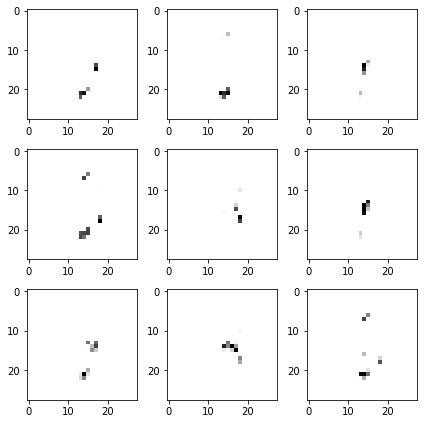

Original:


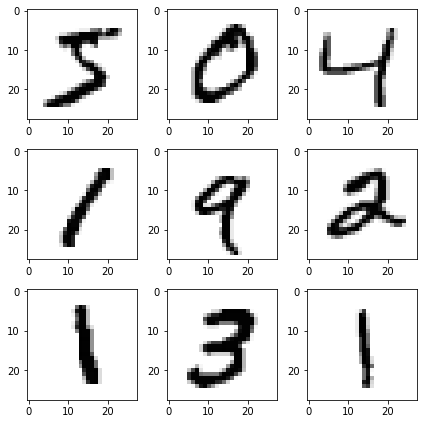

In [27]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(predict[i],cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
print("Predict:")
plt.show()

plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i],cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
print("Original:")
plt.show()

Conlusion: They do not look similar

# Transfer Learning

In this task you should construct your own dataset to perform classification or regression task.
For instance you can
* Predict age (age group) given face image
* Classify different types of vehicles on the image
* Classify smartphone models
* [Your Idea Here]

In [28]:
# Работаю в pyCharm, почему-то команда работает некорректно, баг
# При использовании juputer все должно быть нормально
# Для проверки добавил данные в папку вручную
# UPD: Запустил через colab все работает
!wget https://www.dropbox.com/s/v404peh4g7ixzpq/data.zip?dl=0 -O data_hw13.zip

/bin/sh: wget: command not found


In [28]:
# Работаю в pyCharm, почему-то команда работает некорректно, баг
# При использовании juputer все должно быть нормально
# Для проверки добавил данные в папку вручную
# UPD: Запустил через colab все работает
!wget https://www.dropbox.com/s/v404peh4g7ixzpq/data.zip?dl=0 -O data_hw13.zip

/bin/sh: wget: command not found


## Task 4 (3 points)

Construct your dataset
* It should be you handmade raw dataset (not loaded completely in the web by someone else)
* It should contain at least 500 images (the more - the better)
* Once collected it should be downloadable via `wget` command in terminal (if you have windows you can check it in Google Collab) - for instance use dropbox or Yandex.Disk to get the link

Helpful links: [1](https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/), [2](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

In [29]:
# Работаю в pyCharm, почему-то команда работает некорректно, баг
# При использовании juputer все должно быть нормально
# Для проверки добавил данные в папку вручную
# UPD: Запускал через colab все работает
!unzip data_hw13.zip

unzip:  cannot find or open data_hw13.zip, data_hw13.zip.zip or data_hw13.zip.ZIP.


Прилагаю логи текстом, что б были

In [31]:
# Archive:  data_hw13.zip
# 
#    creating: data/
# 
#    creating: data/images/
# 
#   inflating: data/images/.DS_Store   
# 
#   inflating: __MACOSX/data/images/._.DS_Store  
# 
#    creating: data/images/pen/
# 
#    creating: data/images/not_pen/
# 
#   inflating: data/images/pen/00000428.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000428.jpg  
# 
#   inflating: data/images/pen/00000366.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000366.jpg  
# 
#   inflating: data/images/pen/00000372.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000372.jpg  
# 
#   inflating: data/images/pen/00000399.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000399.jpg  
# 
#   inflating: data/images/pen/00000158.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000158.jpg  
# 
#   inflating: data/images/pen/00000164.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000164.jpg  
# 
#   inflating: data/images/pen/00000170.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000170.jpg  
# 
#   inflating: data/images/pen/00000038.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000038.jpg  
# 
#   inflating: data/images/pen/00000010.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000010.jpg  
# 
#   inflating: data/images/pen/00000004.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000004.jpg  
# 
#   inflating: data/images/pen/00000212.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000212.jpg  
# 
#   inflating: data/images/pen/00000206.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000206.jpg  
# 
#   inflating: data/images/pen/00000207.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000207.jpg  
# 
#   inflating: data/images/pen/00000213.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000213.jpg  
# 
#   inflating: data/images/pen/00000005.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000005.jpg  
# 
#   inflating: data/images/pen/00000011.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000011.jpg  
# 
#   inflating: data/images/pen/00000039.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000039.jpg  
# 
#   inflating: data/images/pen/00000171.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000171.jpg  
# 
#   inflating: data/images/pen/00000159.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000159.jpg  
# 
#   inflating: data/images/pen/00000398.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000398.jpg  
# 
#   inflating: data/images/pen/00000373.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000373.jpg  
# 
#   inflating: data/images/pen/00000401.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000401.jpg  
# 
#   inflating: data/images/pen/00000367.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000367.jpg  
# 
#   inflating: data/images/pen/00000359.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000359.jpg  
# 
#   inflating: data/images/pen/00000417.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000417.jpg  
# 
#   inflating: data/images/pen/00000365.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000365.jpg  
# 
#   inflating: data/images/pen/00000403.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000403.jpg  
# 
#   inflating: data/images/pen/00000173.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000173.jpg  
# 
#   inflating: data/images/pen/00000167.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000167.jpg  
# 
#   inflating: data/images/pen/00000198.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000198.jpg  
# 
#   inflating: data/images/pen/   .jpg  
# 
#   inflating: __MACOSX/data/images/pen/._   .jpg  
# 
#   inflating: data/images/pen/00000007.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000007.jpg  
# 
#   inflating: data/images/pen/00000013.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000013.jpg  
# 
#   inflating: data/images/pen/00000205.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000205.jpg  
# 
#   inflating: data/images/pen/00000204.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000204.jpg  
# 
#   inflating: data/images/pen/00000238.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000238.jpg  
# 
#   inflating: data/images/pen/00000012.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000012.jpg  
# 
#   inflating: data/images/pen/00000006.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000006.jpg  
# 
#   inflating: data/images/pen/00000199.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000199.jpg  
# 
#   inflating: data/images/pen/00000166.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000166.jpg  
# 
#   inflating: data/images/pen/00000172.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000172.jpg  
# 
#   inflating: data/images/pen/00000364.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000364.jpg  
# 
#   inflating: data/images/pen/00000402.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000402.jpg  
# 
#   inflating: data/images/pen/00000416.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000416.jpg  
# 
#   inflating: data/images/pen/00000358.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000358.jpg  
# 
#   inflating: data/images/pen/00000412.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000412.jpg  
# 
#   inflating: data/images/pen/00000360.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000360.jpg  
# 
#   inflating: data/images/pen/00000348.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000348.jpg  
# 
#   inflating: data/images/pen/00000176.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000176.jpg  
# 
#   inflating: data/images/pen/00000162.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000162.jpg  
# 
#   inflating: data/images/pen/00000189.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000189.jpg  
# 
#   inflating: data/images/pen/00000002.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000002.jpg  
# 
#   inflating: data/images/pen/00000016.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000016.jpg  
# 
#   inflating: data/images/pen/00000200.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000200.jpg  
# 
#   inflating: data/images/pen/.DS_Store  
# 
#   inflating: __MACOSX/data/images/pen/._.DS_Store  
# 
#   inflating: data/images/pen/00000228.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000228.jpg  
# 
#   inflating: data/images/pen/00000215.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000215.jpg  
# 
#   inflating: data/images/pen/00000201.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000201.jpg  
# 
#   inflating: data/images/pen/00000017.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000017.jpg  
# 
#   inflating: data/images/pen/00000003.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000003.jpg  
# 
#   inflating: data/images/pen/00000188.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000188.jpg  
# 
#   inflating: data/images/pen/00000177.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000177.jpg  
# 
#   inflating: data/images/pen/00000349.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000349.jpg  
# 
#   inflating: data/images/pen/00000407.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000407.jpg  
# 
#   inflating: data/images/pen/00000361.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000361.jpg  
# 
#   inflating: data/images/pen/00000375.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000375.jpg  
# 
#   inflating: data/images/pen/00000405.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000405.jpg  
# 
#   inflating: data/images/pen/00000411.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000411.jpg  
# 
#   inflating: data/images/pen/00000388.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000388.jpg  
# 
#   inflating: data/images/pen/00000161.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000161.jpg  
# 
#   inflating: data/images/pen/00000175.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000175.jpg  
# 
#   inflating: data/images/pen/00000015.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000015.jpg  
# 
#   inflating: data/images/pen/00000001.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000001.jpg  
# 
#   inflating: data/images/pen/00000203.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000203.jpg  
# 
#   inflating: data/images/pen/00000202.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000202.jpg  
# 
#   inflating: data/images/pen/00000216.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000216.jpg  
# 
#   inflating: data/images/pen/00000028.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000028.jpg  
# 
#   inflating: data/images/pen/00000014.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000014.jpg  
# 
#   inflating: data/images/pen/00000148.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000148.jpg  
# 
#   inflating: data/images/pen/00000389.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000389.jpg  
# 
#   inflating: data/images/pen/00000410.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000410.jpg  
# 
#   inflating: data/images/pen/00000376.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000376.jpg  
# 
#   inflating: data/images/pen/00000362.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000362.jpg  
# 
#   inflating: data/images/pen/00000404.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000404.jpg  
# 
#   inflating: data/images/pen/00000339.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000339.jpg  
# 
#   inflating: data/images/pen/00000107.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000107.jpg  
# 
#   inflating: data/images/pen/00000113.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000113.jpg  
# 
#   inflating: data/images/pen/00000073.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000073.jpg  
# 
#   inflating: data/images/pen/00000098.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000098.jpg  
# 
#   inflating: data/images/pen/00000259.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000259.jpg  
# 
#   inflating: data/images/pen/00000271.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000271.jpg  
# 
#   inflating: data/images/pen/00000270.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000270.jpg  
# 
#   inflating: data/images/pen/00000099.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000099.jpg  
# 
#   inflating: data/images/pen/00000072.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000072.jpg  
# 
#   inflating: data/images/pen/00000112.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000112.jpg  
# 
#   inflating: data/images/pen/00000106.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000106.jpg  
# 
#   inflating: data/images/pen/00000310.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000310.jpg  
# 
#   inflating: data/images/pen/00000306.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000306.jpg  
# 
#   inflating: data/images/pen/00000138.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000138.jpg  
# 
#   inflating: data/images/pen/00000110.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000110.jpg  
# 
#   inflating: data/images/pen/00000104.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000104.jpg  
# 
#   inflating: data/images/pen/00000058.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000058.jpg  
# 
#   inflating: data/images/pen/00000064.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000064.jpg  
# 
#   inflating: data/images/pen/00000070.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000070.jpg  
# 
#   inflating: data/images/pen/00000272.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000272.jpg  
# 
#   inflating: data/images/pen/00000299.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000299.jpg  
# 
#   inflating: data/images/pen/00000298.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000298.jpg  
# 
#   inflating: data/images/pen/00000273.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000273.jpg  
# 
#   inflating: data/images/pen/00000267.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000267.jpg  
# 
#   inflating: data/images/pen/00000071.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000071.jpg  
# 
#   inflating: data/images/pen/00000065.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000065.jpg  
# 
#   inflating: data/images/pen/00000059.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000059.jpg  
# 
#   inflating: data/images/pen/00000105.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000105.jpg  
# 
#   inflating: data/images/pen/00000139.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000139.jpg  
# 
#   inflating: data/images/pen/00000303.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000303.jpg  
# 
#   inflating: data/images/pen/00000115.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000115.jpg  
# 
#   inflating: data/images/pen/00000101.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000101.jpg  
# 
#   inflating: data/images/pen/00000075.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000075.jpg  
# 
#   inflating: data/images/pen/00000263.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000263.jpg  
# 
#   inflating: data/images/pen/00000277.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000277.jpg  
# 
#   inflating: data/images/pen/00000288.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000288.jpg  
# 
#   inflating: data/images/pen/00000276.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000276.jpg  
# 
#   inflating: data/images/pen/00000262.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000262.jpg  
# 
#   inflating: data/images/pen/00000048.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000048.jpg  
# 
#   inflating: data/images/pen/00000074.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000074.jpg  
# 
#   inflating: data/images/pen/00000060.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000060.jpg  
# 
#   inflating: data/images/pen/00000100.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000100.jpg  
# 
#   inflating: data/images/pen/00000302.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000302.jpg  
# 
#   inflating: data/images/pen/00000316.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000316.jpg  
# 
#   inflating: data/images/pen/00000300.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000300.jpg  
# 
#   inflating: data/images/pen/00000314.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000314.jpg  
# 
#   inflating: data/images/pen/00000328.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000328.jpg  
# 
#   inflating: data/images/pen/00000102.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000102.jpg  
# 
#   inflating: data/images/pen/00000116.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000116.jpg  
# 
#   inflating: data/images/pen/00000076.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000076.jpg  
# 
#   inflating: data/images/pen/00000062.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000062.jpg  
# 
#   inflating: data/images/pen/00000089.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000089.jpg  
# 
#   inflating: data/images/pen/00000274.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000274.jpg  
# 
#   inflating: data/images/pen/00000261.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000261.jpg  
# 
#   inflating: data/images/pen/00000275.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000275.jpg  
# 
#   inflating: data/images/pen/00000088.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000088.jpg  
# 
#   inflating: data/images/pen/00000077.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000077.jpg  
# 
#   inflating: data/images/pen/00000117.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000117.jpg  
# 
#   inflating: data/images/pen/00000103.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000103.jpg  
# 
#   inflating: data/images/pen/00000329.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000329.jpg  
# 
#   inflating: data/images/pen/00000315.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000315.jpg  
# 
#   inflating: data/images/pen/00000301.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000301.jpg  
# 
#   inflating: data/images/pen/00000318.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000318.jpg  
# 
#   inflating: data/images/pen/00000330.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000330.jpg  
# 
#   inflating: data/images/pen/00000126.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000126.jpg  
# 
#   inflating: data/images/pen/00000132.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000132.jpg  
# 
#   inflating: data/images/pen/00000052.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000052.jpg  
# 
#   inflating: data/images/pen/00000046.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000046.jpg  
# 
#   inflating: data/images/pen/00000091.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000091.jpg  
# 
#   inflating: data/images/pen/00000085.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000085.jpg  
# 
#   inflating: data/images/pen/00000278.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000278.jpg  
# 
#   inflating: data/images/pen/00000244.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000244.jpg  
# 
#   inflating: data/images/pen/00000293.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000293.jpg  
# 
#   inflating: data/images/pen/00000287.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000287.jpg  
# 
#   inflating: data/images/pen/00000286.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000286.jpg  
# 
#   inflating: data/images/pen/00000245.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000245.jpg  
# 
#   inflating: data/images/pen/00000251.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000251.jpg  
# 
#   inflating: data/images/pen/00000084.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000084.jpg  
# 
#   inflating: data/images/pen/00000090.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000090.jpg  
# 
#   inflating: data/images/pen/00000053.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000053.jpg  
# 
#   inflating: data/images/pen/00000133.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000133.jpg  
# 
#   inflating: data/images/pen/00000127.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000127.jpg  
# 
#   inflating: data/images/pen/00000319.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000319.jpg  
# 
#   inflating: data/images/pen/00000333.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000333.jpg  
# 
#   inflating: data/images/pen/00000327.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000327.jpg  
# 
#   inflating: data/images/pen/00000119.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000119.jpg  
# 
#   inflating: data/images/pen/00000131.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000131.jpg  
# 
#   inflating: data/images/pen/00000125.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000125.jpg  
# 
#   inflating: data/images/pen/00000045.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000045.jpg  
# 
#   inflating: data/images/pen/00000051.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000051.jpg  
# 
#   inflating: data/images/pen/00000086.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000086.jpg  
# 
#   inflating: data/images/pen/00000092.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000092.jpg  
# 
#   inflating: data/images/pen/00000253.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000253.jpg  
# 
#   inflating: data/images/pen/00000290.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000290.jpg  
# 
#   inflating: data/images/pen/00000291.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000291.jpg  
# 
#   inflating: data/images/pen/00000285.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000285.jpg  
# 
#   inflating: data/images/pen/00000252.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000252.jpg  
# 
#   inflating: data/images/pen/00000246.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000246.jpg  
# 
#   inflating: data/images/pen/00000093.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000093.jpg  
# 
#   inflating: data/images/pen/00000087.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000087.jpg  
# 
#   inflating: data/images/pen/00000050.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000050.jpg  
# 
#   inflating: data/images/pen/00000044.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000044.jpg  
# 
#   inflating: data/images/pen/00000124.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000124.jpg  
# 
#   inflating: data/images/pen/00000130.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000130.jpg  
# 
#   inflating: data/images/pen/00000118.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000118.jpg  
# 
#   inflating: data/images/pen/00000326.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000326.jpg  
# 
#   inflating: data/images/pen/00000332.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000332.jpg  
# 
#   inflating: data/images/pen/00000336.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000336.jpg  
# 
#   inflating: data/images/pen/00000322.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000322.jpg  
# 
#   inflating: data/images/pen/00000134.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000134.jpg  
# 
#   inflating: data/images/pen/00000120.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000120.jpg  
# 
#   inflating: data/images/pen/00000108.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000108.jpg  
# 
#   inflating: data/images/pen/00000040.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000040.jpg  
# 
#   inflating: data/images/pen/00000054.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000054.jpg  
# 
#   inflating: data/images/pen/00000068.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000068.jpg  
# 
#   inflating: data/images/pen/00000083.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000083.jpg  
# 
#   inflating: data/images/pen/00000097.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000097.jpg  
# 
#   inflating: data/images/pen/00000256.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000256.jpg  
# 
#   inflating: data/images/pen/00000281.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000281.jpg  
# 
#   inflating: data/images/pen/00000295.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000295.jpg  
# 
#   inflating: data/images/pen/00000294.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000294.jpg  
# 
#   inflating: data/images/pen/00000280.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000280.jpg  
# 
#   inflating: data/images/pen/00000257.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000257.jpg  
# 
#   inflating: data/images/pen/00000243.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000243.jpg  
# 
#   inflating: data/images/pen/00000096.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000096.jpg  
# 
#   inflating: data/images/pen/00000069.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000069.jpg  
# 
#   inflating: data/images/pen/00000055.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000055.jpg  
# 
#   inflating: data/images/pen/00000041.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000041.jpg  
# 
#   inflating: data/images/pen/00000109.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000109.jpg  
# 
#   inflating: data/images/pen/00000121.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000121.jpg  
# 
#   inflating: data/images/pen/00000135.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000135.jpg  
# 
#   inflating: data/images/pen/00000337.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000337.jpg  
# 
#   inflating: data/images/pen/00000321.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000321.jpg  
# 
#   inflating: data/images/pen/00000123.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000123.jpg  
# 
#   inflating: data/images/pen/00000137.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000137.jpg  
# 
#   inflating: data/images/pen/00000057.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000057.jpg  
# 
#   inflating: data/images/pen/00000043.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000043.jpg  
# 
#   inflating: data/images/pen/00000080.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000080.jpg  
# 
#   inflating: data/images/pen/00000255.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000255.jpg  
# 
#   inflating: data/images/pen/00000269.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000269.jpg  
# 
#   inflating: data/images/pen/00000296.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000296.jpg  
# 
#   inflating: data/images/pen/00000282.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000282.jpg  
# 
#   inflating: data/images/pen/00000283.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000283.jpg  
# 
#   inflating: data/images/pen/00000297.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000297.jpg  
# 
#   inflating: data/images/pen/00000268.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000268.jpg  
# 
#   inflating: data/images/pen/00000240.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000240.jpg  
# 
#   inflating: data/images/pen/00000254.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000254.jpg  
# 
#   inflating: data/images/pen/00000081.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000081.jpg  
# 
#   inflating: data/images/pen/00000095.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000095.jpg  
# 
#   inflating: data/images/pen/00000056.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000056.jpg  
# 
#   inflating: data/images/pen/00000136.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000136.jpg  
# 
#   inflating: data/images/pen/00000122.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000122.jpg  
# 
#   inflating: data/images/pen/00000308.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000308.jpg  
# 
#   inflating: data/images/pen/00000334.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000334.jpg  
# 
#   inflating: data/images/pen/00000320.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000320.jpg  
# 
#   inflating: data/images/pen/00000409.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000409.jpg  
# 
#   inflating: data/images/pen/00000421.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000421.jpg  
# 
#   inflating: data/images/pen/00000347.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000347.jpg  
# 
#   inflating: data/images/pen/00000353.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000353.jpg  
# 
#   inflating: data/images/pen/00000390.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000390.jpg  
# 
#   inflating: data/images/pen/00000145.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000145.jpg  
# 
#   inflating: data/images/pen/00000186.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000186.jpg  
# 
#   inflating: data/images/pen/00000192.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000192.jpg  
# 
#   inflating: data/images/pen/00000031.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000031.jpg  
# 
#   inflating: data/images/pen/00000025.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000025.jpg  
# 
#   inflating: data/images/pen/00000233.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000233.jpg  
# 
#   inflating: data/images/pen/00000227.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000227.jpg  
# 
#   inflating: data/images/pen/00000226.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000226.jpg  
# 
#   inflating: data/images/pen/00000030.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000030.jpg  
# 
#   inflating: data/images/pen/00000018.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000018.jpg  
# 
#   inflating: data/images/pen/00000193.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000193.jpg  
# 
#   inflating: data/images/pen/00000187.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000187.jpg  
# 
#   inflating: data/images/pen/00000150.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000150.jpg  
# 
#   inflating: data/images/pen/00000144.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000144.jpg  
# 
#   inflating: data/images/pen/00000178.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000178.jpg  
# 
#   inflating: data/images/pen/00000391.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000391.jpg  
# 
#   inflating: data/images/pen/00000385.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000385.jpg  
# 
#   inflating: data/images/pen/00000352.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000352.jpg  
# 
#   inflating: data/images/pen/00000420.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000420.jpg  
# 
#   inflating: data/images/pen/00000346.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000346.jpg  
# 
#   inflating: data/images/pen/00000408.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000408.jpg  
# 
#   inflating: data/images/pen/00000378.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000378.jpg  
# 
#   inflating: data/images/pen/00000350.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000350.jpg  
# 
#   inflating: data/images/pen/00000344.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000344.jpg  
# 
#   inflating: data/images/pen/00000422.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000422.jpg  
# 
#   inflating: data/images/pen/00000393.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000393.jpg  
# 
#   inflating: data/images/pen/00000387.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000387.jpg  
# 
#   inflating: data/images/pen/00000152.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000152.jpg  
# 
#   inflating: data/images/pen/00000146.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000146.jpg  
# 
#   inflating: data/images/pen/00000191.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000191.jpg  
# 
#   inflating: data/images/pen/00000026.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000026.jpg  
# 
#   inflating: data/images/pen/00000032.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000032.jpg  
# 
#   inflating: data/images/pen/00000230.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000230.jpg  
# 
#   inflating: data/images/pen/00000219.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000219.jpg  
# 
#   inflating: data/images/pen/00000033.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000033.jpg  
# 
#   inflating: data/images/pen/00000027.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000027.jpg  
# 
#   inflating: data/images/pen/00000184.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000184.jpg  
# 
#   inflating: data/images/pen/00000190.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000190.jpg  
# 
#   inflating: data/images/pen/00000147.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000147.jpg  
# 
#   inflating: data/images/pen/00000153.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000153.jpg  
# 
#   inflating: data/images/pen/00000392.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000392.jpg  
# 
#   inflating: data/images/pen/00000345.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000345.jpg  
# 
#   inflating: data/images/pen/00000351.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000351.jpg  
# 
#   inflating: data/images/pen/00000355.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000355.jpg  
# 
#   inflating: data/images/pen/00000427.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000427.jpg  
# 
#   inflating: data/images/pen/00000341.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000341.jpg  
# 
#   inflating: data/images/pen/00000396.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000396.jpg  
# 
#   inflating: data/images/pen/00000382.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000382.jpg  
# 
#   inflating: data/images/pen/00000157.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000157.jpg  
# 
#   inflating: data/images/pen/00000143.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000143.jpg  
# 
#   inflating: data/images/pen/00000194.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000194.jpg  
# 
#   inflating: data/images/pen/00000180.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000180.jpg  
# 
#   inflating: data/images/pen/00000023.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000023.jpg  
# 
#   inflating: data/images/pen/00000037.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000037.jpg  
# 
#   inflating: data/images/pen/00000221.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000221.jpg  
# 
#   inflating: data/images/pen/00000209.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000209.jpg  
# 
#   inflating: data/images/pen/00000208.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000208.jpg  
# 
#   inflating: data/images/pen/00000234.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000234.jpg  
# 
#   inflating: data/images/pen/00000036.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000036.jpg  
# 
#   inflating: data/images/pen/00000022.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000022.jpg  
# 
#   inflating: data/images/pen/00000181.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000181.jpg  
# 
#   inflating: data/images/pen/00000195.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000195.jpg  
# 
#   inflating: data/images/pen/00000142.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000142.jpg  
# 
#   inflating: data/images/pen/00000156.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000156.jpg  
# 
#   inflating: data/images/pen/00000397.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000397.jpg  
# 
#   inflating: data/images/pen/00000368.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000368.jpg  
# 
#   inflating: data/images/pen/00000426.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000426.jpg  
# 
#   inflating: data/images/pen/00000340.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000340.jpg  
# 
#   inflating: data/images/pen/00000354.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000354.jpg  
# 
#   inflating: data/images/pen/00000342.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000342.jpg  
# 
#   inflating: data/images/pen/00000424.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000424.jpg  
# 
#   inflating: data/images/pen/00000356.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000356.jpg  
# 
#   inflating: data/images/pen/00000418.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000418.jpg  
# 
#   inflating: data/images/pen/00000381.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000381.jpg  
# 
#   inflating: data/images/pen/00000395.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000395.jpg  
# 
#   inflating: data/images/pen/00000140.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000140.jpg  
# 
#   inflating: data/images/pen/00000154.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000154.jpg  
# 
#   inflating: data/images/pen/00000168.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000168.jpg  
# 
#   inflating: data/images/pen/00000183.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000183.jpg  
# 
#   inflating: data/images/pen/00000197.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000197.jpg  
# 
#   inflating: data/images/pen/00000034.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000034.jpg  
# 
#   inflating: data/images/pen/00000020.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000020.jpg  
# 
#   inflating: data/images/pen/00000008.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000008.jpg  
# 
#   inflating: data/images/pen/00000236.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000236.jpg  
# 
#   inflating: data/images/pen/00000222.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000222.jpg  
# 
#   inflating: data/images/pen/00000223.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000223.jpg  
# 
#   inflating: data/images/pen/00000237.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000237.jpg  
# 
#   inflating: data/images/pen/00000009.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000009.jpg  
# 
#   inflating: data/images/pen/00000021.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000021.jpg  
# 
#   inflating: data/images/pen/00000035.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000035.jpg  
# 
#   inflating: data/images/pen/00000182.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000182.jpg  
# 
#   inflating: data/images/pen/00000169.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000169.jpg  
# 
#   inflating: data/images/pen/00000155.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000155.jpg  
# 
#   inflating: data/images/pen/00000141.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000141.jpg  
# 
#   inflating: data/images/pen/00000394.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000394.jpg  
# 
#   inflating: data/images/pen/00000343.jpg  
# 
#   inflating: __MACOSX/data/images/pen/._00000343.jpg  
# 
#   inflating: data/images/not_pen/00000400.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000400.jpg  
# 
#   inflating: data/images/not_pen/00000366.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000366.jpg  
# 
#   inflating: data/images/not_pen/00000372.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000372.jpg  
# 
#   inflating: data/images/not_pen/00000399.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000399.jpg  
# 
#   inflating: data/images/not_pen/00000158.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000158.jpg  
# 
#   inflating: data/images/not_pen/00000164.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000164.jpg  
# 
#   inflating: data/images/not_pen/00000170.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000170.jpg  
# 
#   inflating: data/images/not_pen/00000038.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000038.jpg  
# 
#   inflating: data/images/not_pen/00000010.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000010.jpg  
# 
#   inflating: data/images/not_pen/00000004.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000004.jpg  
# 
#   inflating: data/images/not_pen/00000212.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000212.jpg  
# 
#   inflating: data/images/not_pen/00000206.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000206.jpg  
# 
#   inflating: data/images/not_pen/00000207.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000207.jpg  
# 
#   inflating: data/images/not_pen/00000213.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000213.jpg  
# 
#   inflating: data/images/not_pen/00000005.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000005.jpg  
# 
#   inflating: data/images/not_pen/00000039.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000039.jpg  
# 
#   inflating: data/images/not_pen/00000171.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000171.jpg  
# 
#   inflating: data/images/not_pen/00000165.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000165.jpg  
# 
#   inflating: data/images/not_pen/00000159.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000159.jpg  
# 
#   inflating: data/images/not_pen/00000398.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000398.jpg  
# 
#   inflating: data/images/not_pen/00000373.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000373.jpg  
# 
#   inflating: data/images/not_pen/00000367.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000367.jpg  
# 
#   inflating: data/images/not_pen/00000359.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000359.jpg  
# 
#   inflating: data/images/not_pen/00000371.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000371.jpg  
# 
#   inflating: data/images/not_pen/00000365.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000365.jpg  
# 
#   inflating: data/images/not_pen/00000167.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000167.jpg  
# 
#   inflating: data/images/not_pen/00000198.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000198.jpg  
# 
#   inflating: data/images/not_pen/00000007.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000007.jpg  
# 
#   inflating: data/images/not_pen/00000013.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000013.jpg  
# 
#   inflating: data/images/not_pen/00000239.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000239.jpg  
# 
#   inflating: data/images/not_pen/00000205.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000205.jpg  
# 
#   inflating: data/images/not_pen/00000210.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000210.jpg  
# 
#   inflating: data/images/not_pen/00000204.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000204.jpg  
# 
#   inflating: data/images/not_pen/00000238.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000238.jpg  
# 
#   inflating: data/images/not_pen/00000012.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000012.jpg  
# 
#   inflating: data/images/not_pen/00000006.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000006.jpg  
# 
#   inflating: data/images/not_pen/00000199.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000199.jpg  
# 
#   inflating: data/images/not_pen/00000166.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000166.jpg  
# 
#   inflating: data/images/not_pen/00000172.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000172.jpg  
# 
#   inflating: data/images/not_pen/00000364.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000364.jpg  
# 
#   inflating: data/images/not_pen/00000370.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000370.jpg  
# 
#   inflating: data/images/not_pen/00000358.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000358.jpg  
# 
#   inflating: data/images/not_pen/00000374.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000374.jpg  
# 
#   inflating: data/images/not_pen/00000360.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000360.jpg  
# 
#   inflating: data/images/not_pen/00000348.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000348.jpg  
# 
#   inflating: data/images/not_pen/00000176.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000176.jpg  
# 
#   inflating: data/images/not_pen/00000162.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000162.jpg  
# 
#   inflating: data/images/not_pen/00000002.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000002.jpg  
# 
#   inflating: data/images/not_pen/00000016.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000016.jpg  
# 
#   inflating: data/images/not_pen/00000200.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000200.jpg  
# 
#   inflating: data/images/not_pen/.DS_Store  
# 
#   inflating: __MACOSX/data/images/not_pen/._.DS_Store  
# 
#   inflating: data/images/not_pen/00000214.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000214.jpg  
# 
#   inflating: data/images/not_pen/00000228.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000228.jpg  
# 
#   inflating: data/images/not_pen/00000229.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000229.jpg  
# 
#   inflating: data/images/not_pen/00000215.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000215.jpg  
# 
#   inflating: data/images/not_pen/00000201.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000201.jpg  
# 
#   inflating: data/images/not_pen/00000017.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000017.jpg  
# 
#   inflating: data/images/not_pen/00000188.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000188.jpg  
# 
#   inflating: data/images/not_pen/00000163.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000163.jpg  
# 
#   inflating: data/images/not_pen/00000177.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000177.jpg  
# 
#   inflating: data/images/not_pen/00000349.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000349.jpg  
# 
#   inflating: data/images/not_pen/00000361.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000361.jpg  
# 
#   inflating: data/images/not_pen/00000375.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000375.jpg  
# 
#   inflating: data/images/not_pen/00000363.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000363.jpg  
# 
#   inflating: data/images/not_pen/00000377.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000377.jpg  
# 
#   inflating: data/images/not_pen/00000388.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000388.jpg  
# 
#   inflating: data/images/not_pen/00000161.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000161.jpg  
# 
#   inflating: data/images/not_pen/00000175.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000175.jpg  
# 
#   inflating: data/images/not_pen/00000149.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000149.jpg  
# 
#   inflating: data/images/not_pen/00000015.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000015.jpg  
# 
#   inflating: data/images/not_pen/00000001.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000001.jpg  
# 
#   inflating: data/images/not_pen/00000029.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000029.jpg  
# 
#   inflating: data/images/not_pen/00000217.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000217.jpg  
# 
#   inflating: data/images/not_pen/00000203.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000203.jpg  
# 
#   inflating: data/images/not_pen/00000202.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000202.jpg  
# 
#   inflating: data/images/not_pen/00000216.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000216.jpg  
# 
#   inflating: data/images/not_pen/00000028.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000028.jpg  
# 
#   inflating: data/images/not_pen/00000000.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000000.jpg  
# 
#   inflating: data/images/not_pen/00000014.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000014.jpg  
# 
#   inflating: data/images/not_pen/00000148.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000148.jpg  
# 
#   inflating: data/images/not_pen/00000174.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000174.jpg  
# 
#   inflating: data/images/not_pen/00000160.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000160.jpg  
# 
#   inflating: data/images/not_pen/00000389.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000389.jpg  
# 
#   inflating: data/images/not_pen/00000376.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000376.jpg  
# 
#   inflating: data/images/not_pen/00000362.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000362.jpg  
# 
#   inflating: data/images/not_pen/00000339.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000339.jpg  
# 
#   inflating: data/images/not_pen/00000305.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000305.jpg  
# 
#   inflating: data/images/not_pen/00000311.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000311.jpg  
# 
#   inflating: data/images/not_pen/00000107.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000107.jpg  
# 
#   inflating: data/images/not_pen/00000113.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000113.jpg  
# 
#   inflating: data/images/not_pen/00000073.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000073.jpg  
# 
#   inflating: data/images/not_pen/00000067.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000067.jpg  
# 
#   inflating: data/images/not_pen/00000259.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000259.jpg  
# 
#   inflating: data/images/not_pen/00000271.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000271.jpg  
# 
#   inflating: data/images/not_pen/00000265.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000265.jpg  
# 
#   inflating: data/images/not_pen/00000264.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000264.jpg  
# 
#   inflating: data/images/not_pen/00000270.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000270.jpg  
# 
#   inflating: data/images/not_pen/00000258.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000258.jpg  
# 
#   inflating: data/images/not_pen/00000099.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000099.jpg  
# 
#   inflating: data/images/not_pen/00000066.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000066.jpg  
# 
#   inflating: data/images/not_pen/00000072.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000072.jpg  
# 
#   inflating: data/images/not_pen/00000112.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000112.jpg  
# 
#   inflating: data/images/not_pen/00000310.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000310.jpg  
# 
#   inflating: data/images/not_pen/00000304.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000304.jpg  
# 
#   inflating: data/images/not_pen/00000338.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000338.jpg  
# 
#   inflating: data/images/not_pen/00000312.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000312.jpg  
# 
#   inflating: data/images/not_pen/00000306.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000306.jpg  
# 
#   inflating: data/images/not_pen/00000138.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000138.jpg  
# 
#   inflating: data/images/not_pen/00000110.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000110.jpg  
# 
#   inflating: data/images/not_pen/00000104.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000104.jpg  
# 
#   inflating: data/images/not_pen/00000058.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000058.jpg  
# 
#   inflating: data/images/not_pen/00000064.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000064.jpg  
# 
#   inflating: data/images/not_pen/00000070.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000070.jpg  
# 
#   inflating: data/images/not_pen/00000266.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000266.jpg  
# 
#   inflating: data/images/not_pen/00000272.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000272.jpg  
# 
#   inflating: data/images/not_pen/00000299.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000299.jpg  
# 
#   inflating: data/images/not_pen/00000298.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000298.jpg  
# 
#   inflating: data/images/not_pen/00000273.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000273.jpg  
# 
#   inflating: data/images/not_pen/00000267.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000267.jpg  
# 
#   inflating: data/images/not_pen/00000071.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000071.jpg  
# 
#   inflating: data/images/not_pen/00000065.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000065.jpg  
# 
#   inflating: data/images/not_pen/00000059.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000059.jpg  
# 
#   inflating: data/images/not_pen/00000105.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000105.jpg  
# 
#   inflating: data/images/not_pen/00000111.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000111.jpg  
# 
#   inflating: data/images/not_pen/00000139.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000139.jpg  
# 
#   inflating: data/images/not_pen/00000307.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000307.jpg  
# 
#   inflating: data/images/not_pen/00000313.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000313.jpg  
# 
#   inflating: data/images/not_pen/00000317.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000317.jpg  
# 
#   inflating: data/images/not_pen/00000303.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000303.jpg  
# 
#   inflating: data/images/not_pen/00000115.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000115.jpg  
# 
#   inflating: data/images/not_pen/00000101.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000101.jpg  
# 
#   inflating: data/images/not_pen/00000129.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000129.jpg  
# 
#   inflating: data/images/not_pen/00000061.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000061.jpg  
# 
#   inflating: data/images/not_pen/00000075.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000075.jpg  
# 
#   inflating: data/images/not_pen/00000049.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000049.jpg  
# 
#   inflating: data/images/not_pen/00000263.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000263.jpg  
# 
#   inflating: data/images/not_pen/00000288.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000288.jpg  
# 
#   inflating: data/images/not_pen/00000289.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000289.jpg  
# 
#   inflating: data/images/not_pen/00000276.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000276.jpg  
# 
#   inflating: data/images/not_pen/00000262.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000262.jpg  
# 
#   inflating: data/images/not_pen/00000048.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000048.jpg  
# 
#   inflating: data/images/not_pen/00000074.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000074.jpg  
# 
#   inflating: data/images/not_pen/00000060.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000060.jpg  
# 
#   inflating: data/images/not_pen/00000128.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000128.jpg  
# 
#   inflating: data/images/not_pen/00000100.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000100.jpg  
# 
#   inflating: data/images/not_pen/00000114.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000114.jpg  
# 
#   inflating: data/images/not_pen/00000302.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000302.jpg  
# 
#   inflating: data/images/not_pen/00000300.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000300.jpg  
# 
#   inflating: data/images/not_pen/00000314.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000314.jpg  
# 
#   inflating: data/images/not_pen/00000328.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000328.jpg  
# 
#   inflating: data/images/not_pen/00000102.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000102.jpg  
# 
#   inflating: data/images/not_pen/00000116.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000116.jpg  
# 
#   inflating: data/images/not_pen/00000076.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000076.jpg  
# 
#   inflating: data/images/not_pen/00000089.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000089.jpg  
# 
#   inflating: data/images/not_pen/00000274.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000274.jpg  
# 
#   inflating: data/images/not_pen/00000260.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000260.jpg  
# 
#   inflating: data/images/not_pen/00000248.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000248.jpg  
# 
#   inflating: data/images/not_pen/00000249.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000249.jpg  
# 
#   inflating: data/images/not_pen/00000261.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000261.jpg  
# 
#   inflating: data/images/not_pen/00000275.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000275.jpg  
# 
#   inflating: data/images/not_pen/00000088.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000088.jpg  
# 
#   inflating: data/images/not_pen/00000063.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000063.jpg  
# 
#   inflating: data/images/not_pen/00000077.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000077.jpg  
# 
#   inflating: data/images/not_pen/00000117.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000117.jpg  
# 
#   inflating: data/images/not_pen/00000103.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000103.jpg  
# 
#   inflating: data/images/not_pen/00000329.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000329.jpg  
# 
#   inflating: data/images/not_pen/00000315.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000315.jpg  
# 
#   inflating: data/images/not_pen/00000301.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000301.jpg  
# 
#   inflating: data/images/not_pen/00000318.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000318.jpg  
# 
#   inflating: data/images/not_pen/00000330.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000330.jpg  
# 
#   inflating: data/images/not_pen/00000126.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000126.jpg  
# 
#   inflating: data/images/not_pen/00000132.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000132.jpg  
# 
#   inflating: data/images/not_pen/00000052.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000052.jpg  
# 
#   inflating: data/images/not_pen/00000046.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000046.jpg  
# 
#   inflating: data/images/not_pen/00000091.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000091.jpg  
# 
#   inflating: data/images/not_pen/00000085.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000085.jpg  
# 
#   inflating: data/images/not_pen/00000278.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000278.jpg  
# 
#   inflating: data/images/not_pen/00000250.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000250.jpg  
# 
#   inflating: data/images/not_pen/00000244.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000244.jpg  
# 
#   inflating: data/images/not_pen/00000293.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000293.jpg  
# 
#   inflating: data/images/not_pen/00000287.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000287.jpg  
# 
#   inflating: data/images/not_pen/00000286.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000286.jpg  
# 
#   inflating: data/images/not_pen/00000292.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000292.jpg  
# 
#   inflating: data/images/not_pen/00000245.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000245.jpg  
# 
#   inflating: data/images/not_pen/00000251.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000251.jpg  
# 
#   inflating: data/images/not_pen/00000279.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000279.jpg  
# 
#   inflating: data/images/not_pen/00000084.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000084.jpg  
# 
#   inflating: data/images/not_pen/00000090.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000090.jpg  
# 
#   inflating: data/images/not_pen/00000047.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000047.jpg  
# 
#   inflating: data/images/not_pen/00000053.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000053.jpg  
# 
#   inflating: data/images/not_pen/00000133.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000133.jpg  
# 
#   inflating: data/images/not_pen/00000127.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000127.jpg  
# 
#   inflating: data/images/not_pen/00000331.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000331.jpg  
# 
#   inflating: data/images/not_pen/00000325.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000325.jpg  
# 
#   inflating: data/images/not_pen/00000319.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000319.jpg  
# 
#   inflating: data/images/not_pen/00000333.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000333.jpg  
# 
#   inflating: data/images/not_pen/00000327.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000327.jpg  
# 
#   inflating: data/images/not_pen/00000119.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000119.jpg  
# 
#   inflating: data/images/not_pen/00000131.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000131.jpg  
# 
#   inflating: data/images/not_pen/00000125.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000125.jpg  
# 
#   inflating: data/images/not_pen/00000079.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000079.jpg  
# 
#   inflating: data/images/not_pen/00000045.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000045.jpg  
# 
#   inflating: data/images/not_pen/00000051.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000051.jpg  
# 
#   inflating: data/images/not_pen/00000086.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000086.jpg  
# 
#   inflating: data/images/not_pen/00000092.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000092.jpg  
# 
#   inflating: data/images/not_pen/00000247.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000247.jpg  
# 
#   inflating: data/images/not_pen/00000253.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000253.jpg  
# 
#   inflating: data/images/not_pen/00000284.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000284.jpg  
# 
#   inflating: data/images/not_pen/00000290.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000290.jpg  
# 
#   inflating: data/images/not_pen/00000291.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000291.jpg  
# 
#   inflating: data/images/not_pen/00000285.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000285.jpg  
# 
#   inflating: data/images/not_pen/00000252.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000252.jpg  
# 
#   inflating: data/images/not_pen/00000093.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000093.jpg  
# 
#   inflating: data/images/not_pen/00000087.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000087.jpg  
# 
#   inflating: data/images/not_pen/00000050.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000050.jpg  
# 
#   inflating: data/images/not_pen/00000044.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000044.jpg  
# 
#   inflating: data/images/not_pen/00000078.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000078.jpg  
# 
#   inflating: data/images/not_pen/00000124.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000124.jpg  
# 
#   inflating: data/images/not_pen/00000130.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000130.jpg  
# 
#   inflating: data/images/not_pen/00000118.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000118.jpg  
# 
#   inflating: data/images/not_pen/00000326.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000326.jpg  
# 
#   inflating: data/images/not_pen/00000336.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000336.jpg  
# 
#   inflating: data/images/not_pen/00000322.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000322.jpg  
# 
#   inflating: data/images/not_pen/00000134.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000134.jpg  
# 
#   inflating: data/images/not_pen/00000120.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000120.jpg  
# 
#   inflating: data/images/not_pen/00000108.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000108.jpg  
# 
#   inflating: data/images/not_pen/00000040.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000040.jpg  
# 
#   inflating: data/images/not_pen/00000068.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000068.jpg  
# 
#   inflating: data/images/not_pen/00000083.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000083.jpg  
# 
#   inflating: data/images/not_pen/00000097.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000097.jpg  
# 
#   inflating: data/images/not_pen/00000242.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000242.jpg  
# 
#   inflating: data/images/not_pen/00000256.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000256.jpg  
# 
#   inflating: data/images/not_pen/00000281.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000281.jpg  
# 
#   inflating: data/images/not_pen/00000294.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000294.jpg  
# 
#   inflating: data/images/not_pen/00000280.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000280.jpg  
# 
#   inflating: data/images/not_pen/00000257.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000257.jpg  
# 
#   inflating: data/images/not_pen/00000243.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000243.jpg  
# 
#   inflating: data/images/not_pen/00000096.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000096.jpg  
# 
#   inflating: data/images/not_pen/00000082.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000082.jpg  
# 
#   inflating: data/images/not_pen/00000055.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000055.jpg  
# 
#   inflating: data/images/not_pen/00000041.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000041.jpg  
# 
#   inflating: data/images/not_pen/00000109.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000109.jpg  
# 
#   inflating: data/images/not_pen/00000121.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000121.jpg  
# 
#   inflating: data/images/not_pen/00000135.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000135.jpg  
# 
#   inflating: data/images/not_pen/00000323.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000323.jpg  
# 
#   inflating: data/images/not_pen/00000337.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000337.jpg  
# 
#   inflating: data/images/not_pen/00000321.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000321.jpg  
# 
#   inflating: data/images/not_pen/00000335.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000335.jpg  
# 
#   inflating: data/images/not_pen/00000309.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000309.jpg  
# 
#   inflating: data/images/not_pen/00000123.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000123.jpg  
# 
#   inflating: data/images/not_pen/00000137.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000137.jpg  
# 
#   inflating: data/images/not_pen/00000057.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000057.jpg  
# 
#   inflating: data/images/not_pen/00000094.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000094.jpg  
# 
#   inflating: data/images/not_pen/00000080.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000080.jpg  
# 
#   inflating: data/images/not_pen/00000255.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000255.jpg  
# 
#   inflating: data/images/not_pen/00000241.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000241.jpg  
# 
#   inflating: data/images/not_pen/00000269.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000269.jpg  
# 
#   inflating: data/images/not_pen/00000296.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000296.jpg  
# 
#   inflating: data/images/not_pen/00000282.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000282.jpg  
# 
#   inflating: data/images/not_pen/00000283.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000283.jpg  
# 
#   inflating: data/images/not_pen/00000297.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000297.jpg  
# 
#   inflating: data/images/not_pen/00000268.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000268.jpg  
# 
#   inflating: data/images/not_pen/00000240.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000240.jpg  
# 
#   inflating: data/images/not_pen/00000254.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000254.jpg  
# 
#   inflating: data/images/not_pen/00000081.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000081.jpg  
# 
#   inflating: data/images/not_pen/00000095.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000095.jpg  
# 
#   inflating: data/images/not_pen/00000042.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000042.jpg  
# 
#   inflating: data/images/not_pen/00000056.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000056.jpg  
# 
#   inflating: data/images/not_pen/00000136.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000136.jpg  
# 
#   inflating: data/images/not_pen/00000122.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000122.jpg  
# 
#   inflating: data/images/not_pen/00000308.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000308.jpg  
# 
#   inflating: data/images/not_pen/00000334.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000334.jpg  
# 
#   inflating: data/images/not_pen/00000320.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000320.jpg  
# 
#   inflating: data/images/not_pen/00000347.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000347.jpg  
# 
#   inflating: data/images/not_pen/00000384.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000384.jpg  
# 
#   inflating: data/images/not_pen/00000390.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000390.jpg  
# 
#   inflating: data/images/not_pen/00000179.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000179.jpg  
# 
#   inflating: data/images/not_pen/00000145.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000145.jpg  
# 
#   inflating: data/images/not_pen/00000151.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000151.jpg  
# 
#   inflating: data/images/not_pen/00000186.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000186.jpg  
# 
#   inflating: data/images/not_pen/00000019.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000019.jpg  
# 
#   inflating: data/images/not_pen/00000031.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000031.jpg  
# 
#   inflating: data/images/not_pen/00000025.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000025.jpg  
# 
#   inflating: data/images/not_pen/00000233.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000233.jpg  
# 
#   inflating: data/images/not_pen/00000232.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000232.jpg  
# 
#   inflating: data/images/not_pen/00000024.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000024.jpg  
# 
#   inflating: data/images/not_pen/00000030.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000030.jpg  
# 
#   inflating: data/images/not_pen/00000018.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000018.jpg  
# 
#   inflating: data/images/not_pen/00000193.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000193.jpg  
# 
#   inflating: data/images/not_pen/00000187.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000187.jpg  
# 
#   inflating: data/images/not_pen/00000150.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000150.jpg  
# 
#   inflating: data/images/not_pen/00000144.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000144.jpg  
# 
#   inflating: data/images/not_pen/00000178.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000178.jpg  
# 
#   inflating: data/images/not_pen/00000391.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000391.jpg  
# 
#   inflating: data/images/not_pen/00000385.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000385.jpg  
# 
#   inflating: data/images/not_pen/00000352.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000352.jpg  
# 
#   inflating: data/images/not_pen/00000346.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000346.jpg  
# 
#   inflating: data/images/not_pen/00000378.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000378.jpg  
# 
#   inflating: data/images/not_pen/00000350.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000350.jpg  
# 
#   inflating: data/images/not_pen/00000344.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000344.jpg  
# 
#   inflating: data/images/not_pen/00000393.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000393.jpg  
# 
#   inflating: data/images/not_pen/00000387.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000387.jpg  
# 
#   inflating: data/images/not_pen/00000152.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000152.jpg  
# 
#   inflating: data/images/not_pen/00000146.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000146.jpg  
# 
#   inflating: data/images/not_pen/00000191.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000191.jpg  
# 
#   inflating: data/images/not_pen/00000185.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000185.jpg  
# 
#   inflating: data/images/not_pen/00000026.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000026.jpg  
# 
#   inflating: data/images/not_pen/00000032.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000032.jpg  
# 
#   inflating: data/images/not_pen/00000218.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000218.jpg  
# 
#   inflating: data/images/not_pen/00000224.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000224.jpg  
# 
#   inflating: data/images/not_pen/00000230.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000230.jpg  
# 
#   inflating: data/images/not_pen/00000231.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000231.jpg  
# 
#   inflating: data/images/not_pen/00000225.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000225.jpg  
# 
#   inflating: data/images/not_pen/00000219.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000219.jpg  
# 
#   inflating: data/images/not_pen/00000033.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000033.jpg  
# 
#   inflating: data/images/not_pen/00000027.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000027.jpg  
# 
#   inflating: data/images/not_pen/00000184.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000184.jpg  
# 
#   inflating: data/images/not_pen/00000190.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000190.jpg  
# 
#   inflating: data/images/not_pen/00000147.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000147.jpg  
# 
#   inflating: data/images/not_pen/00000153.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000153.jpg  
# 
#   inflating: data/images/not_pen/00000386.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000386.jpg  
# 
#   inflating: data/images/not_pen/00000345.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000345.jpg  
# 
#   inflating: data/images/not_pen/00000351.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000351.jpg  
# 
#   inflating: data/images/not_pen/00000379.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000379.jpg  
# 
#   inflating: data/images/not_pen/00000355.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000355.jpg  
# 
#   inflating: data/images/not_pen/00000341.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000341.jpg  
# 
#   inflating: data/images/not_pen/00000369.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000369.jpg  
# 
#   inflating: data/images/not_pen/00000396.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000396.jpg  
# 
#   inflating: data/images/not_pen/00000382.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000382.jpg  
# 
#   inflating: data/images/not_pen/00000157.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000157.jpg  
# 
#   inflating: data/images/not_pen/00000143.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000143.jpg  
# 
#   inflating: data/images/not_pen/00000194.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000194.jpg  
# 
#   inflating: data/images/not_pen/00000180.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000180.jpg  
# 
#   inflating: data/images/not_pen/00000023.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000023.jpg  
# 
#   inflating: data/images/not_pen/00000037.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000037.jpg  
# 
#   inflating: data/images/not_pen/00000221.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000221.jpg  
# 
#   inflating: data/images/not_pen/00000235.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000235.jpg  
# 
#   inflating: data/images/not_pen/00000209.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000209.jpg  
# 
#   inflating: data/images/not_pen/00000208.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000208.jpg  
# 
#   inflating: data/images/not_pen/00000234.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000234.jpg  
# 
#   inflating: data/images/not_pen/00000220.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000220.jpg  
# 
#   inflating: data/images/not_pen/00000036.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000036.jpg  
# 
#   inflating: data/images/not_pen/00000022.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000022.jpg  
# 
#   inflating: data/images/not_pen/00000181.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000181.jpg  
# 
#   inflating: data/images/not_pen/00000195.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000195.jpg  
# 
#   inflating: data/images/not_pen/00000142.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000142.jpg  
# 
#   inflating: data/images/not_pen/00000156.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000156.jpg  
# 
#   inflating: data/images/not_pen/00000383.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000383.jpg  
# 
#   inflating: data/images/not_pen/00000397.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000397.jpg  
# 
#   inflating: data/images/not_pen/00000340.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000340.jpg  
# 
#   inflating: data/images/not_pen/00000354.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000354.jpg  
# 
#   inflating: data/images/not_pen/00000342.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000342.jpg  
# 
#   inflating: data/images/not_pen/00000356.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000356.jpg  
# 
#   inflating: data/images/not_pen/00000381.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000381.jpg  
# 
#   inflating: data/images/not_pen/00000140.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000140.jpg  
# 
#   inflating: data/images/not_pen/00000154.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000154.jpg  
# 
#   inflating: data/images/not_pen/00000168.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000168.jpg  
# 
#   inflating: data/images/not_pen/00000183.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000183.jpg  
# 
#   inflating: data/images/not_pen/00000197.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000197.jpg  
# 
#   inflating: data/images/not_pen/00000034.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000034.jpg  
# 
#   inflating: data/images/not_pen/00000020.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000020.jpg  
# 
#   inflating: data/images/not_pen/00000008.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000008.jpg  
# 
#   inflating: data/images/not_pen/00000236.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000236.jpg  
# 
#   inflating: data/images/not_pen/00000223.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000223.jpg  
# 
#   inflating: data/images/not_pen/00000237.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000237.jpg  
# 
#   inflating: data/images/not_pen/00000009.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000009.jpg  
# 
#   inflating: data/images/not_pen/00000021.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000021.jpg  
# 
#   inflating: data/images/not_pen/00000035.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000035.jpg  
# 
#   inflating: data/images/not_pen/00000196.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000196.jpg  
# 
#   inflating: data/images/not_pen/00000182.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000182.jpg  
# 
#   inflating: data/images/not_pen/00000169.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000169.jpg  
# 
#   inflating: data/images/not_pen/00000155.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000155.jpg  
# 
#   inflating: data/images/not_pen/00000141.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000141.jpg  
# 
#   inflating: data/images/not_pen/00000394.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000394.jpg  
# 
#   inflating: data/images/not_pen/00000380.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000380.jpg  
# 
#   inflating: data/images/not_pen/00000357.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000357.jpg  
# 
#   inflating: data/images/not_pen/00000343.jpg  
# 
#   inflating: __MACOSX/data/images/not_pen/._00000343.jpg

In [13]:
# Работаю в pyCharm, почему-то команда работает некорректно, баг
# При использовании juputer все должно быть нормально
# Для проверки добавил данные в папку вручную
# UPD: Запустил через colab все работает
!wget https://www.dropbox.com/s/v404peh4g7ixzpq/data.zip?dl=0 -O data_hw13.zip

/bin/sh: wget: command not found


In [32]:
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Task 5 (1 point)

Prepare your dataset to be put through your model

* Resize and normalize images
* Split data in train and validation sets
* Prepare data generator with image augmentation for training set

In [33]:
img_width, img_height = 256, 256
batch_size = 64
epochs = 10
num_classes = 2

In [34]:
images = []
labels = []

for image_path in glob.glob('./data_hw13/images/*pen/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        if '/pen' in image_path:
            labels.append(1)
        if '/not_pen' in image_path:
            labels.append(0)
    except Exception as e:
        print(e)

In [35]:
images = np.array(images).astype(np.float32) / 255.0
labels = np.array(labels).astype(np.float32)

In [36]:
from tensorflow.python.keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    test_size=0.33, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [17]:
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
from tensorflow.keras import applications

## Task 5 (1 point)

* Use any pretrained model and replace dence layers
* Freeze (make untrainable) all weight except for dence layers weights and train your model
* Report train and validation losses
* Unfreeze other weights, report train validation losses

In [41]:
model = applications.VGG19(weights = "imagenet", 
                           include_top=False, input_shape = (img_width, img_height, 3))

In [42]:
for layer in model.layers[:5]:
    layer.trainable = False

In [43]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [45]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [47]:
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [160]:
model_final.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=32,
                    validation_data=(X_test, y_test),
                    workers=4,
                    callbacks=[checkpoint, early])

Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10


 1/32 [..............................] - ETA: 0s - loss: 0.8749 - accuracy: 0.4839

 2/32 [>.............................] - ETA: 1:13:45 - loss: 0.8563 - accuracy: 0.4000

 3/32 [=>............................] - ETA: 1:16:22 - loss: 0.8362 - accuracy: 0.4088

 4/32 [==>...........................] - ETA: 1:11:00 - loss: 0.8222 - accuracy: 0.4305

 5/32 [===>..........................] - ETA: 1:05:51 - loss: 0.8146 - accuracy: 0.4251

 6/32 [====>.........................] - ETA: 59:46 - loss: 0.7953 - accuracy: 0.4501  

 7/32 [=====>........................] - ETA: 54:48 - loss: 0.7912 - accuracy: 0.4530

 8/32 [======>.......................] - ETA: 50:42 - loss: 0.7744 - accuracy: 0.4760

 9/32 [=======>......................] - ETA: 47:00 - loss: 0.7791 - accuracy: 0.4788

10/32 [========>.....................] - ETA: 44:01 - loss: 0.7746 - accuracy: 0.4876

11/32 [=========>....................] - ETA: 40:59 - loss: 0.7646 - accuracy: 0.4963

12/32 [==========>...................] - ETA: 38:14 - loss: 0.7609 - accuracy: 0.4952

13/32 [===========>..................] - ETA: 35:39 - loss: 0.7499 - accuracy: 0.5106

14/32 [============>.................] - ETA: 33:13 - loss: 0.7430 - accuracy: 0.5156

15/32 [=============>................] - ETA: 30:56 - loss: 0.7352 - accuracy: 0.5232

16/32 [==============>...............] - ETA: 28:02 - loss: 0.7291 - accuracy: 0.5313

17/32 [==============>...............] - ETA: 26:02 - loss: 0.7229 - accuracy: 0.5382

18/32 [===============>..............] - ETA: 24:12 - loss: 0.7167 - accuracy: 0.5414

19/32 [================>.............] - ETA: 22:35 - loss: 0.7115 - accuracy: 0.5470

20/32 [=================>............] - ETA: 20:55 - loss: 0.7046 - accuracy: 0.5577

21/32 [==================>...........] - ETA: 19:19 - loss: 0.6981 - accuracy: 0.5665

22/32 [===================>..........] - ETA: 17:33 - loss: 0.6909 - accuracy: 0.5753

23/32 [====================>.........] - ETA: 15:46 - loss: 0.6881 - accuracy: 0.5775

24/32 [=====================>........] - ETA: 13:41 - loss: 0.6863 - accuracy: 0.5804

25/32 [======================>.......] - ETA: 11:41 - loss: 0.6836 - accuracy: 0.5824

26/32 [=======================>......] - ETA: 9:59 - loss: 0.6773 - accuracy: 0.5914 

27/32 [========================>.....] - ETA: 8:17 - loss: 0.6726 - accuracy: 0.5971

28/32 [=========================>....] - ETA: 6:35 - loss: 0.6683 - accuracy: 0.6024

29/32 [==========================>...] - ETA: 4:55 - loss: 0.6630 - accuracy: 0.6079

30/32 [===========================>..] - ETA: 3:16 - loss: 0.6576 - accuracy: 0.6135

31/32 [============================>.] - ETA: 1:37 - loss: 0.6530 - accuracy: 0.6193

32/32 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.6253  

32/32 [==============================] - 3233s 101s/step - loss: 0.6470 - accuracy: 0.6253 - val_loss: 0.3623 - val_accuracy: 0.9451


Epoch 2/10


 1/32 [..............................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7812

 2/32 [>.............................] - ETA: 22:19 - loss: 0.5266 - accuracy: 0.7734

 3/32 [=>............................] - ETA: 28:50 - loss: 0.5105 - accuracy: 0.7760

 4/32 [==>...........................] - ETA: 31:13 - loss: 0.4931 - accuracy: 0.7812

 5/32 [===>..........................] - ETA: 32:04 - loss: 0.4944 - accuracy: 0.7781

 6/32 [====>.........................] - ETA: 32:07 - loss: 0.4870 - accuracy: 0.7786

 7/32 [=====>........................] - ETA: 28:58 - loss: 0.4798 - accuracy: 0.7880

 8/32 [======>.......................] - ETA: 28:56 - loss: 0.4799 - accuracy: 0.7808

 9/32 [=======>......................] - ETA: 28:26 - loss: 0.4681 - accuracy: 0.7882

10/32 [========>.....................] - ETA: 27:55 - loss: 0.4613 - accuracy: 0.7990

11/32 [=========>....................] - ETA: 27:05 - loss: 0.4501 - accuracy: 0.8107

12/32 [==========>...................] - ETA: 24:49 - loss: 0.4488 - accuracy: 0.8120

13/32 [===========>..................] - ETA: 23:56 - loss: 0.4410 - accuracy: 0.8198

14/32 [============>.................] - ETA: 22:57 - loss: 0.4315 - accuracy: 0.8313

15/32 [=============>................] - ETA: 21:55 - loss: 0.4317 - accuracy: 0.8289

16/32 [==============>...............] - ETA: 20:55 - loss: 0.4252 - accuracy: 0.8309

17/32 [==============>...............] - ETA: 19:47 - loss: 0.4175 - accuracy: 0.8366

18/32 [===============>..............] - ETA: 18:37 - loss: 0.4109 - accuracy: 0.8425

19/32 [================>.............] - ETA: 17:24 - loss: 0.4065 - accuracy: 0.8452

20/32 [=================>............] - ETA: 16:09 - loss: 0.4044 - accuracy: 0.8460

21/32 [==================>...........] - ETA: 14:27 - loss: 0.4010 - accuracy: 0.8482

22/32 [===================>..........] - ETA: 13:13 - loss: 0.3964 - accuracy: 0.8503

23/32 [====================>.........] - ETA: 11:57 - loss: 0.3928 - accuracy: 0.8507

24/32 [=====================>........] - ETA: 10:42 - loss: 0.3864 - accuracy: 0.8546

25/32 [======================>.......] - ETA: 9:25 - loss: 0.3869 - accuracy: 0.8528 

26/32 [=======================>......] - ETA: 8:05 - loss: 0.3846 - accuracy: 0.8537

27/32 [========================>.....] - ETA: 6:46 - loss: 0.3772 - accuracy: 0.8582

28/32 [=========================>....] - ETA: 5:26 - loss: 0.3721 - accuracy: 0.8606

29/32 [==========================>...] - ETA: 4:05 - loss: 0.3690 - accuracy: 0.8600

30/32 [===========================>..] - ETA: 2:44 - loss: 0.3649 - accuracy: 0.8633

31/32 [============================>.] - ETA: 1:22 - loss: 0.3594 - accuracy: 0.8668

32/32 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8690  

32/32 [==============================] - 2699s 84s/step - loss: 0.3565 - accuracy: 0.8690 - val_loss: 0.1221 - val_accuracy: 0.9747


Epoch 3/10


 1/32 [..............................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9688

 2/32 [>.............................] - ETA: 21:55 - loss: 0.2103 - accuracy: 0.9453

 3/32 [=>............................] - ETA: 28:25 - loss: 0.2130 - accuracy: 0.9427

 4/32 [==>...........................] - ETA: 30:52 - loss: 0.2074 - accuracy: 0.9336

 5/32 [===>..........................] - ETA: 31:37 - loss: 0.2100 - accuracy: 0.9281

 6/32 [====>.........................] - ETA: 28:25 - loss: 0.2100 - accuracy: 0.9231

 7/32 [=====>........................] - ETA: 28:35 - loss: 0.2198 - accuracy: 0.9253

 8/32 [======>.......................] - ETA: 28:43 - loss: 0.2257 - accuracy: 0.9207

 9/32 [=======>......................] - ETA: 28:14 - loss: 0.2225 - accuracy: 0.9227

10/32 [========>.....................] - ETA: 27:32 - loss: 0.2249 - accuracy: 0.9209

11/32 [=========>....................] - ETA: 25:12 - loss: 0.2316 - accuracy: 0.9169

12/32 [==========>...................] - ETA: 24:24 - loss: 0.2270 - accuracy: 0.9202

13/32 [===========>..................] - ETA: 23:31 - loss: 0.2211 - accuracy: 0.9204

14/32 [============>.................] - ETA: 22:33 - loss: 0.2149 - accuracy: 0.9253

15/32 [=============>................] - ETA: 21:32 - loss: 0.2162 - accuracy: 0.9228

16/32 [==============>...............] - ETA: 20:33 - loss: 0.2184 - accuracy: 0.9228

17/32 [==============>...............] - ETA: 19:26 - loss: 0.2131 - accuracy: 0.9266

18/32 [===============>..............] - ETA: 18:15 - loss: 0.2079 - accuracy: 0.9291

19/32 [================>.............] - ETA: 17:03 - loss: 0.2105 - accuracy: 0.9287

20/32 [=================>............] - ETA: 15:51 - loss: 0.2118 - accuracy: 0.9267

21/32 [==================>...........] - ETA: 14:36 - loss: 0.2098 - accuracy: 0.9280

22/32 [===================>..........] - ETA: 13:19 - loss: 0.2061 - accuracy: 0.9292

23/32 [====================>.........] - ETA: 11:44 - loss: 0.2044 - accuracy: 0.9301

24/32 [=====================>........] - ETA: 10:31 - loss: 0.2016 - accuracy: 0.9311

25/32 [======================>.......] - ETA: 9:14 - loss: 0.2013 - accuracy: 0.9307 

26/32 [=======================>......] - ETA: 7:57 - loss: 0.1993 - accuracy: 0.9310

27/32 [========================>.....] - ETA: 6:39 - loss: 0.1984 - accuracy: 0.9319

28/32 [=========================>....] - ETA: 5:14 - loss: 0.1976 - accuracy: 0.9313

29/32 [==========================>...] - ETA: 3:56 - loss: 0.1952 - accuracy: 0.9316

30/32 [===========================>..] - ETA: 2:38 - loss: 0.1923 - accuracy: 0.9323

31/32 [============================>.] - ETA: 1:19 - loss: 0.1907 - accuracy: 0.9330

32/32 [==============================] - ETA: 0s - loss: 0.1883 - accuracy: 0.9337  

32/32 [==============================] - 2659s 83s/step - loss: 0.1883 - accuracy: 0.9337 - val_loss: 0.0653 - val_accuracy: 0.9747


Epoch 4/10


 1/32 [..............................] - ETA: 0s - loss: 0.1541 - accuracy: 0.9219

 2/32 [>.............................] - ETA: 22:18 - loss: 0.1579 - accuracy: 0.9375

 3/32 [=>............................] - ETA: 28:37 - loss: 0.1670 - accuracy: 0.9323

 4/32 [==>...........................] - ETA: 25:32 - loss: 0.1530 - accuracy: 0.9417

 5/32 [===>..........................] - ETA: 27:30 - loss: 0.1385 - accuracy: 0.9477

 6/32 [====>.........................] - ETA: 28:31 - loss: 0.1415 - accuracy: 0.9459

 7/32 [=====>........................] - ETA: 28:38 - loss: 0.1426 - accuracy: 0.9470

 8/32 [======>.......................] - ETA: 28:49 - loss: 0.1476 - accuracy: 0.9436

 9/32 [=======>......................] - ETA: 26:19 - loss: 0.1435 - accuracy: 0.9451

10/32 [========>.....................] - ETA: 25:55 - loss: 0.1440 - accuracy: 0.9460

11/32 [=========>....................] - ETA: 25:16 - loss: 0.1437 - accuracy: 0.9467

12/32 [==========>...................] - ETA: 24:32 - loss: 0.1388 - accuracy: 0.9487

13/32 [===========>..................] - ETA: 23:37 - loss: 0.1429 - accuracy: 0.9478

14/32 [============>.................] - ETA: 22:40 - loss: 0.1366 - accuracy: 0.9518

15/32 [=============>................] - ETA: 21:38 - loss: 0.1394 - accuracy: 0.9497

16/32 [==============>...............] - ETA: 20:37 - loss: 0.1435 - accuracy: 0.9478

17/32 [==============>...............] - ETA: 19:32 - loss: 0.1475 - accuracy: 0.9452

18/32 [===============>..............] - ETA: 18:20 - loss: 0.1466 - accuracy: 0.9466

19/32 [================>.............] - ETA: 17:07 - loss: 0.1464 - accuracy: 0.9470

20/32 [=================>............] - ETA: 15:52 - loss: 0.1454 - accuracy: 0.9473

21/32 [==================>...........] - ETA: 14:13 - loss: 0.1463 - accuracy: 0.9470

22/32 [===================>..........] - ETA: 13:00 - loss: 0.1465 - accuracy: 0.9458

23/32 [====================>.........] - ETA: 11:45 - loss: 0.1440 - accuracy: 0.9468

24/32 [=====================>........] - ETA: 10:31 - loss: 0.1428 - accuracy: 0.9478

25/32 [======================>.......] - ETA: 9:15 - loss: 0.1418 - accuracy: 0.9467 

26/32 [=======================>......] - ETA: 7:57 - loss: 0.1429 - accuracy: 0.9463

27/32 [========================>.....] - ETA: 6:31 - loss: 0.1413 - accuracy: 0.9474

28/32 [=========================>....] - ETA: 5:15 - loss: 0.1428 - accuracy: 0.9470

29/32 [==========================>...] - ETA: 3:59 - loss: 0.1438 - accuracy: 0.9466

30/32 [===========================>..] - ETA: 2:41 - loss: 0.1402 - accuracy: 0.9485

31/32 [============================>.] - ETA: 1:21 - loss: 0.1371 - accuracy: 0.9503

32/32 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9515  

32/32 [==============================] - 2746s 86s/step - loss: 0.1349 - accuracy: 0.9515 - val_loss: 0.0472 - val_accuracy: 0.9789


Epoch 5/10


 1/32 [..............................] - ETA: 0s - loss: 0.1557 - accuracy: 0.9219

 2/32 [>.............................] - ETA: 25:34 - loss: 0.1086 - accuracy: 0.9531

 3/32 [=>............................] - ETA: 32:50 - loss: 0.1035 - accuracy: 0.9531

 4/32 [==>...........................] - ETA: 35:22 - loss: 0.1077 - accuracy: 0.9570

 5/32 [===>..........................] - ETA: 36:18 - loss: 0.1121 - accuracy: 0.9563

 6/32 [====>.........................] - ETA: 36:26 - loss: 0.1120 - accuracy: 0.9583

 7/32 [=====>........................] - ETA: 35:58 - loss: 0.1306 - accuracy: 0.9509

 8/32 [======>.......................] - ETA: 32:51 - loss: 0.1299 - accuracy: 0.9520

 9/32 [=======>......................] - ETA: 32:23 - loss: 0.1303 - accuracy: 0.9540

10/32 [========>.....................] - ETA: 29:38 - loss: 0.1295 - accuracy: 0.9547

11/32 [=========>....................] - ETA: 28:57 - loss: 0.1285 - accuracy: 0.9545

12/32 [==========>...................] - ETA: 28:02 - loss: 0.1293 - accuracy: 0.9544

13/32 [===========>..................] - ETA: 27:01 - loss: 0.1299 - accuracy: 0.9543

14/32 [============>.................] - ETA: 25:52 - loss: 0.1258 - accuracy: 0.9554

15/32 [=============>................] - ETA: 24:45 - loss: 0.1187 - accuracy: 0.9586

16/32 [==============>...............] - ETA: 23:37 - loss: 0.1195 - accuracy: 0.9582

17/32 [==============>...............] - ETA: 21:32 - loss: 0.1187 - accuracy: 0.9585

18/32 [===============>..............] - ETA: 20:20 - loss: 0.1170 - accuracy: 0.9582

19/32 [================>.............] - ETA: 19:01 - loss: 0.1137 - accuracy: 0.9606

20/32 [=================>............] - ETA: 17:40 - loss: 0.1114 - accuracy: 0.9619

21/32 [==================>...........] - ETA: 16:17 - loss: 0.1134 - accuracy: 0.9606

22/32 [===================>..........] - ETA: 14:53 - loss: 0.1118 - accuracy: 0.9618

23/32 [====================>.........] - ETA: 13:28 - loss: 0.1130 - accuracy: 0.9607

24/32 [=====================>........] - ETA: 12:03 - loss: 0.1116 - accuracy: 0.9617

25/32 [======================>.......] - ETA: 10:36 - loss: 0.1124 - accuracy: 0.9607

26/32 [=======================>......] - ETA: 9:07 - loss: 0.1118 - accuracy: 0.9604 

27/32 [========================>.....] - ETA: 7:37 - loss: 0.1113 - accuracy: 0.9601

28/32 [=========================>....] - ETA: 6:07 - loss: 0.1113 - accuracy: 0.9598

29/32 [==========================>...] - ETA: 4:36 - loss: 0.1121 - accuracy: 0.9596

30/32 [===========================>..] - ETA: 3:01 - loss: 0.1120 - accuracy: 0.9597

31/32 [============================>.] - ETA: 1:30 - loss: 0.1125 - accuracy: 0.9590

32/32 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9603  

32/32 [==============================] - 3048s 95s/step - loss: 0.1102 - accuracy: 0.9603 - val_loss: 0.0462 - val_accuracy: 0.9789


Epoch 6/10


 1/32 [..............................] - ETA: 0s - loss: 0.0702 - accuracy: 0.9844

 2/32 [>.............................] - ETA: 25:50 - loss: 0.0615 - accuracy: 0.9844

 3/32 [=>............................] - ETA: 32:45 - loss: 0.0705 - accuracy: 0.9792

 4/32 [==>...........................] - ETA: 35:38 - loss: 0.0746 - accuracy: 0.9766

 5/32 [===>..........................] - ETA: 31:46 - loss: 0.0713 - accuracy: 0.9756

 6/32 [====>.........................] - ETA: 32:36 - loss: 0.0740 - accuracy: 0.9772

 7/32 [=====>........................] - ETA: 32:45 - loss: 0.0743 - accuracy: 0.9735

 8/32 [======>.......................] - ETA: 32:52 - loss: 0.0817 - accuracy: 0.9666

 9/32 [=======>......................] - ETA: 32:25 - loss: 0.0803 - accuracy: 0.9669

10/32 [========>.....................] - ETA: 31:34 - loss: 0.0875 - accuracy: 0.9638

11/32 [=========>....................] - ETA: 30:34 - loss: 0.0883 - accuracy: 0.9657

12/32 [==========>...................] - ETA: 29:25 - loss: 0.0867 - accuracy: 0.9673

13/32 [===========>..................] - ETA: 26:57 - loss: 0.0883 - accuracy: 0.9674

14/32 [============>.................] - ETA: 25:52 - loss: 0.0896 - accuracy: 0.9663

15/32 [=============>................] - ETA: 24:43 - loss: 0.0866 - accuracy: 0.9676

16/32 [==============>...............] - ETA: 23:34 - loss: 0.0869 - accuracy: 0.9676

17/32 [==============>...............] - ETA: 22:18 - loss: 0.0885 - accuracy: 0.9667

18/32 [===============>..............] - ETA: 20:57 - loss: 0.0859 - accuracy: 0.9678

19/32 [================>.............] - ETA: 19:34 - loss: 0.0867 - accuracy: 0.9678

20/32 [=================>............] - ETA: 17:38 - loss: 0.0888 - accuracy: 0.9670

21/32 [==================>...........] - ETA: 16:16 - loss: 0.0890 - accuracy: 0.9655

22/32 [===================>..........] - ETA: 14:53 - loss: 0.0876 - accuracy: 0.9664

23/32 [====================>.........] - ETA: 13:28 - loss: 0.0854 - accuracy: 0.9672

24/32 [=====================>........] - ETA: 12:03 - loss: 0.0842 - accuracy: 0.9680

25/32 [======================>.......] - ETA: 10:35 - loss: 0.0828 - accuracy: 0.9687

26/32 [=======================>......] - ETA: 9:07 - loss: 0.0856 - accuracy: 0.9681 

27/32 [========================>.....] - ETA: 7:37 - loss: 0.0867 - accuracy: 0.9681

28/32 [=========================>....] - ETA: 6:07 - loss: 0.0860 - accuracy: 0.9687

29/32 [==========================>...] - ETA: 4:36 - loss: 0.0877 - accuracy: 0.9687

30/32 [===========================>..] - ETA: 3:04 - loss: 0.0877 - accuracy: 0.9681

31/32 [============================>.] - ETA: 1:32 - loss: 0.0866 - accuracy: 0.9687

32/32 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9671  

32/32 [==============================] - 3042s 95s/step - loss: 0.0892 - accuracy: 0.9671 - val_loss: 0.0440 - val_accuracy: 0.9873


Epoch 7/10


 1/32 [..............................] - ETA: 0s - loss: 0.0699 - accuracy: 0.9677

 2/32 [>.............................] - ETA: 25:46 - loss: 0.0653 - accuracy: 0.9684

 3/32 [=>............................] - ETA: 33:10 - loss: 0.0838 - accuracy: 0.9560

 4/32 [==>...........................] - ETA: 35:33 - loss: 0.0672 - accuracy: 0.9686

 5/32 [===>..........................] - ETA: 36:22 - loss: 0.0633 - accuracy: 0.9721

 6/32 [====>.........................] - ETA: 36:56 - loss: 0.0568 - accuracy: 0.9772

 7/32 [=====>........................] - ETA: 36:27 - loss: 0.0710 - accuracy: 0.9711

 8/32 [======>.......................] - ETA: 35:54 - loss: 0.0774 - accuracy: 0.9708

 9/32 [=======>......................] - ETA: 34:54 - loss: 0.0760 - accuracy: 0.9724

10/32 [========>.....................] - ETA: 33:49 - loss: 0.0742 - accuracy: 0.9720

11/32 [=========>....................] - ETA: 32:35 - loss: 0.0737 - accuracy: 0.9717

12/32 [==========>...................] - ETA: 29:47 - loss: 0.0737 - accuracy: 0.9701

13/32 [===========>..................] - ETA: 28:37 - loss: 0.0705 - accuracy: 0.9726

14/32 [============>.................] - ETA: 27:20 - loss: 0.0711 - accuracy: 0.9723

15/32 [=============>................] - ETA: 26:00 - loss: 0.0682 - accuracy: 0.9743

16/32 [==============>...............] - ETA: 24:42 - loss: 0.0671 - accuracy: 0.9749

17/32 [==============>...............] - ETA: 23:18 - loss: 0.0693 - accuracy: 0.9746

18/32 [===============>..............] - ETA: 21:53 - loss: 0.0694 - accuracy: 0.9751

19/32 [================>.............] - ETA: 20:25 - loss: 0.0702 - accuracy: 0.9748

20/32 [=================>............] - ETA: 18:22 - loss: 0.0693 - accuracy: 0.9754

21/32 [==================>...........] - ETA: 16:55 - loss: 0.0745 - accuracy: 0.9727

22/32 [===================>..........] - ETA: 15:26 - loss: 0.0742 - accuracy: 0.9725

23/32 [====================>.........] - ETA: 13:56 - loss: 0.0716 - accuracy: 0.9738

24/32 [=====================>........] - ETA: 12:27 - loss: 0.0712 - accuracy: 0.9736

25/32 [======================>.......] - ETA: 10:56 - loss: 0.0735 - accuracy: 0.9714

26/32 [=======================>......] - ETA: 9:24 - loss: 0.0715 - accuracy: 0.9725 

27/32 [========================>.....] - ETA: 7:51 - loss: 0.0693 - accuracy: 0.9736

28/32 [=========================>....] - ETA: 6:10 - loss: 0.0694 - accuracy: 0.9729

29/32 [==========================>...] - ETA: 4:38 - loss: 0.0721 - accuracy: 0.9716

30/32 [===========================>..] - ETA: 3:06 - loss: 0.0710 - accuracy: 0.9720

31/32 [============================>.] - ETA: 1:33 - loss: 0.0714 - accuracy: 0.9725

32/32 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.9708  

32/32 [==============================] - 3127s 98s/step - loss: 0.0731 - accuracy: 0.9708 - val_loss: 0.0598 - val_accuracy: 0.9831


Epoch 8/10


 1/32 [..............................] - ETA: 0s - loss: 0.0511 - accuracy: 0.9688

 2/32 [>.............................] - ETA: 25:28 - loss: 0.0386 - accuracy: 0.9844

 3/32 [=>............................] - ETA: 32:51 - loss: 0.0355 - accuracy: 0.9844

 4/32 [==>...........................] - ETA: 35:38 - loss: 0.0342 - accuracy: 0.9883

 5/32 [===>..........................] - ETA: 36:35 - loss: 0.0535 - accuracy: 0.9812

 6/32 [====>.........................] - ETA: 36:31 - loss: 0.0558 - accuracy: 0.9792

 7/32 [=====>........................] - ETA: 36:14 - loss: 0.0647 - accuracy: 0.9777

 8/32 [======>.......................] - ETA: 33:02 - loss: 0.0733 - accuracy: 0.9749

 9/32 [=======>......................] - ETA: 30:13 - loss: 0.0698 - accuracy: 0.9765

10/32 [========>.....................] - ETA: 29:51 - loss: 0.0704 - accuracy: 0.9774

11/32 [=========>....................] - ETA: 29:17 - loss: 0.0687 - accuracy: 0.9781

12/32 [==========>...................] - ETA: 28:24 - loss: 0.0669 - accuracy: 0.9786

13/32 [===========>..................] - ETA: 27:18 - loss: 0.0652 - accuracy: 0.9778

14/32 [============>.................] - ETA: 26:12 - loss: 0.0648 - accuracy: 0.9771

15/32 [=============>................] - ETA: 24:59 - loss: 0.0648 - accuracy: 0.9776

16/32 [==============>...............] - ETA: 23:51 - loss: 0.0666 - accuracy: 0.9770

17/32 [==============>...............] - ETA: 22:33 - loss: 0.0695 - accuracy: 0.9755

18/32 [===============>..............] - ETA: 21:09 - loss: 0.0665 - accuracy: 0.9770

19/32 [================>.............] - ETA: 19:45 - loss: 0.0685 - accuracy: 0.9748

20/32 [=================>............] - ETA: 18:19 - loss: 0.0689 - accuracy: 0.9745

21/32 [==================>...........] - ETA: 16:24 - loss: 0.0674 - accuracy: 0.9751

22/32 [===================>..........] - ETA: 15:00 - loss: 0.0665 - accuracy: 0.9756

23/32 [====================>.........] - ETA: 13:34 - loss: 0.0653 - accuracy: 0.9760

24/32 [=====================>........] - ETA: 12:09 - loss: 0.0655 - accuracy: 0.9763

25/32 [======================>.......] - ETA: 10:41 - loss: 0.0654 - accuracy: 0.9760

26/32 [=======================>......] - ETA: 9:11 - loss: 0.0655 - accuracy: 0.9764 

27/32 [========================>.....] - ETA: 7:41 - loss: 0.0655 - accuracy: 0.9767

28/32 [=========================>....] - ETA: 6:10 - loss: 0.0650 - accuracy: 0.9764

29/32 [==========================>...] - ETA: 4:32 - loss: 0.0644 - accuracy: 0.9768

30/32 [===========================>..] - ETA: 3:02 - loss: 0.0636 - accuracy: 0.9776

31/32 [============================>.] - ETA: 1:31 - loss: 0.0646 - accuracy: 0.9779

32/32 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9781  

32/32 [==============================] - 3068s 96s/step - loss: 0.0641 - accuracy: 0.9781 - val_loss: 0.0517 - val_accuracy: 0.9831


Epoch 9/10


 1/32 [..............................] - ETA: 0s - loss: 0.1018 - accuracy: 0.9531

 2/32 [>.............................] - ETA: 12:09 - loss: 0.0819 - accuracy: 0.9684

 3/32 [=>............................] - ETA: 24:24 - loss: 0.0745 - accuracy: 0.9686

 4/32 [==>...........................] - ETA: 29:19 - loss: 0.0691 - accuracy: 0.9731

 5/32 [===>..........................] - ETA: 31:37 - loss: 0.0661 - accuracy: 0.9721

 6/32 [====>.........................] - ETA: 32:36 - loss: 0.0628 - accuracy: 0.9744

 7/32 [=====>........................] - ETA: 32:50 - loss: 0.0656 - accuracy: 0.9735

 8/32 [======>.......................] - ETA: 32:56 - loss: 0.0638 - accuracy: 0.9729

 9/32 [=======>......................] - ETA: 32:27 - loss: 0.0616 - accuracy: 0.9742

10/32 [========>.....................] - ETA: 29:45 - loss: 0.0603 - accuracy: 0.9756

11/32 [=========>....................] - ETA: 29:28 - loss: 0.0616 - accuracy: 0.9765

12/32 [==========>...................] - ETA: 28:32 - loss: 0.0603 - accuracy: 0.9758

13/32 [===========>..................] - ETA: 27:29 - loss: 0.0617 - accuracy: 0.9739

14/32 [============>.................] - ETA: 26:17 - loss: 0.0659 - accuracy: 0.9735

15/32 [=============>................] - ETA: 25:09 - loss: 0.0624 - accuracy: 0.9754

16/32 [==============>...............] - ETA: 23:56 - loss: 0.0613 - accuracy: 0.9760

17/32 [==============>...............] - ETA: 22:36 - loss: 0.0607 - accuracy: 0.9755

18/32 [===============>..............] - ETA: 20:32 - loss: 0.0603 - accuracy: 0.9753

19/32 [================>.............] - ETA: 19:12 - loss: 0.0579 - accuracy: 0.9758

20/32 [=================>............] - ETA: 17:53 - loss: 0.0602 - accuracy: 0.9746

21/32 [==================>...........] - ETA: 16:30 - loss: 0.0582 - accuracy: 0.9759

22/32 [===================>..........] - ETA: 15:04 - loss: 0.0561 - accuracy: 0.9771

23/32 [====================>.........] - ETA: 13:37 - loss: 0.0576 - accuracy: 0.9767

24/32 [=====================>........] - ETA: 12:11 - loss: 0.0570 - accuracy: 0.9770

25/32 [======================>.......] - ETA: 10:27 - loss: 0.0569 - accuracy: 0.9768

26/32 [=======================>......] - ETA: 9:00 - loss: 0.0558 - accuracy: 0.9778 

27/32 [========================>.....] - ETA: 7:31 - loss: 0.0556 - accuracy: 0.9781

28/32 [=========================>....] - ETA: 6:02 - loss: 0.0582 - accuracy: 0.9771

29/32 [==========================>...] - ETA: 4:32 - loss: 0.0571 - accuracy: 0.9780

30/32 [===========================>..] - ETA: 3:02 - loss: 0.0566 - accuracy: 0.9782

31/32 [============================>.] - ETA: 1:31 - loss: 0.0565 - accuracy: 0.9779

32/32 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9781  

32/32 [==============================] - 3061s 96s/step - loss: 0.0561 - accuracy: 0.9781 - val_loss: 0.0471 - val_accuracy: 0.9873


Epoch 10/10


 1/32 [..............................] - ETA: 0s - loss: 0.0711 - accuracy: 0.9688

 2/32 [>.............................] - ETA: 24:46 - loss: 0.0580 - accuracy: 0.9766

 3/32 [=>............................] - ETA: 23:31 - loss: 0.0476 - accuracy: 0.9811

 4/32 [==>...........................] - ETA: 28:38 - loss: 0.0444 - accuracy: 0.9821

 5/32 [===>..........................] - ETA: 30:54 - loss: 0.0491 - accuracy: 0.9756

 6/32 [====>.........................] - ETA: 31:59 - loss: 0.0524 - accuracy: 0.9744

 7/32 [=====>........................] - ETA: 32:09 - loss: 0.0484 - accuracy: 0.9783

 8/32 [======>.......................] - ETA: 32:21 - loss: 0.0461 - accuracy: 0.9812

 9/32 [=======>......................] - ETA: 31:47 - loss: 0.0430 - accuracy: 0.9834

10/32 [========>.....................] - ETA: 29:08 - loss: 0.0418 - accuracy: 0.9843

11/32 [=========>....................] - ETA: 28:28 - loss: 0.0410 - accuracy: 0.9843

12/32 [==========>...................] - ETA: 27:38 - loss: 0.0439 - accuracy: 0.9829

13/32 [===========>..................] - ETA: 26:37 - loss: 0.0430 - accuracy: 0.9830

14/32 [============>.................] - ETA: 25:30 - loss: 0.0446 - accuracy: 0.9819

15/32 [=============>................] - ETA: 24:25 - loss: 0.0453 - accuracy: 0.9810

16/32 [==============>...............] - ETA: 23:18 - loss: 0.0448 - accuracy: 0.9823

17/32 [==============>...............] - ETA: 21:15 - loss: 0.0466 - accuracy: 0.9808

18/32 [===============>..............] - ETA: 20:02 - loss: 0.0514 - accuracy: 0.9801

19/32 [================>.............] - ETA: 18:45 - loss: 0.0488 - accuracy: 0.9812

20/32 [=================>............] - ETA: 17:29 - loss: 0.0500 - accuracy: 0.9805

21/32 [==================>...........] - ETA: 16:07 - loss: 0.0501 - accuracy: 0.9807

22/32 [===================>..........] - ETA: 14:44 - loss: 0.0523 - accuracy: 0.9801

23/32 [====================>.........] - ETA: 13:20 - loss: 0.0531 - accuracy: 0.9796

24/32 [=====================>........] - ETA: 11:56 - loss: 0.0542 - accuracy: 0.9798

25/32 [======================>.......] - ETA: 10:29 - loss: 0.0551 - accuracy: 0.9793

26/32 [=======================>......] - ETA: 9:02 - loss: 0.0587 - accuracy: 0.9770 

27/32 [========================>.....] - ETA: 7:23 - loss: 0.0578 - accuracy: 0.9774

28/32 [=========================>....] - ETA: 5:57 - loss: 0.0596 - accuracy: 0.9771

29/32 [==========================>...] - ETA: 4:28 - loss: 0.0627 - accuracy: 0.9756

30/32 [===========================>..] - ETA: 2:59 - loss: 0.0622 - accuracy: 0.9765

31/32 [============================>.] - ETA: 1:30 - loss: 0.0635 - accuracy: 0.9752

32/32 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9749  

32/32 [==============================] - 3017s 94s/step - loss: 0.0629 - accuracy: 0.9749 - val_loss: 0.0502 - val_accuracy: 0.9831


In [161]:
from sklearn.metrics import accuracy_score

y_pred = model_final.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_score(y_pred=y_pred_labels, y_true=y_test[:,1])

0.9831223628691983

In [23]:
from tensorflow.keras import applications